<a href="https://colab.research.google.com/github/diyaa1201/Analysis-of-Inflation-on-Business-Cycle/blob/main/Analysis_of_inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cpi_data.csv to cpi_data (1).csv
Saving economic_data.csv to economic_data (1).csv


# LOAD THE **DATASETS**

In [ ]:
import os
import pandas as pd

# See all uploaded files
print("Your uploaded files:")
files = os.listdir('/content')
for file in files:
    print(f" {file}")

# Tell me the exact file names you see above

Your uploaded files:
 .config
 final_cleaned_merged_data.csv
 economic_data.csv
 economic_data (1).csv
 cleaned_cpi_data.csv
 cpi_data (1).csv
 analysis_ready_data_sorted.csv
 cpi_data.csv
 final_cleaned_economic_cpi_data.csv
 cleaned_economic_data.csv
 merged_economic_cpi_data.csv
 final_merged_dataset.csv
 sample_data


In [ ]:
# Load your datasets
df_economic = pd.read_csv('/content/economic_data.csv')
df_cpi = pd.read_csv('/content/cpi_data.csv')

# Check what's inside
print("     ECONOMIC DATA:    ")
print("\nShape:", df_economic.shape)
print("\nColumns:", df_economic.columns.tolist())
print("\nFirst 3 rows:")
print(df_economic.head(3))

print("\n   CPI DATA:   ")
print("\nShape:", df_cpi.shape)
print("\nColumns:", df_cpi.columns.tolist())
print("\nFirst 3 rows:")
print(df_cpi.head(3))

     ECONOMIC DATA:    

Shape: (78, 15)

Columns: ['Year', 'GVA at Basic Prices', 'Net taxes on products', 'Gross Domestic Product', 'Consumption of Fixed Capital', 'Net Domestic Product', 'Primary income receivable from ROW (net)', 'Gross National Income', 'Net National Income', 'Gross Capital Formation', 'Net Capital Formation', 'Per Capita GDP (₹)', 'Per Capita GNI (₹)', 'Per Capita NNI (₹)', 'Per Capita PFCE (₹)']

First 3 rows:
         Year GVA at Basic Prices Net taxes on products  \
0           1                   2                     3   
1  2024-25            1,71,87,446             16,09,509   
2  2023-24            1,61,51,477             14,99,114   

  Gross Domestic Product Consumption of Fixed Capital Net Domestic Product  \
0                      4                            5                    6   
1            1,87,96,955                            -          1,64,25,021   
2            1,76,50,591                    22,28,967          1,54,21,624   

  Primary in

# CLEANING THE DATA


In [ ]:
# Clean Economic Data
print("CLEANING ECONOMIC DATA")
df_economic_clean = df_economic.drop(index=0)  # Remove first row
df_economic_clean = df_economic_clean.reset_index(drop=True)

# Clean CPI Data
print("CLEANING CPI DATA")
df_cpi_clean = df_cpi.drop(index=[0, 1])  # Remove first two messy rows
df_cpi_clean = df_cpi_clean.reset_index(drop=True)

# Check how many columns CPI data actually has
print(f"CPI data has {len(df_cpi_clean.columns)} columns")

# Set proper column names for CPI data (12 columns now)
new_cpi_columns = ['Year_AL', 'CPI_AL', 'Empty1', 'Year_IW', 'CPI_IW', 'CPI_IW_Food',
                   'Empty2', 'Year_New', 'Rural', 'Urban', 'Combined', 'Food_Beverages']
df_cpi_clean.columns = new_cpi_columns

print("\nCLEANED ECONOMIC DATA:\n")
print(df_economic_clean.head(2))
print("\n\n CLEANED CPI DATA:\n")
print(df_cpi_clean.head(2))

CLEANING ECONOMIC DATA
CLEANING CPI DATA
CPI data has 12 columns

CLEANED ECONOMIC DATA:

         Year GVA at Basic Prices Net taxes on products  \
0  2024-25            1,71,87,446             16,09,509   
1  2023-24            1,61,51,477             14,99,114   

  Gross Domestic Product Consumption of Fixed Capital Net Domestic Product  \
0            1,87,96,955                            -          1,64,25,021   
1            1,76,50,591                    22,28,967          1,54,21,624   

  Primary income receivable from ROW (net) Gross National Income  \
0                                        -           1,85,23,133   
1                                -2,45,953           1,74,04,638   

  Net National Income Gross Capital Formation Net Capital Formation  \
0         1,61,51,199                       -                     -   
1         1,51,75,671               61,14,637             38,85,671   

  Per Capita GDP (₹) Per Capita GNI (₹) Per Capita NNI (₹) Per Capita PFCE (₹)

# CLEANING-DATA TYPES FIXING

In [ ]:
import numpy as np

# Fix Economic Data - remove commas and convert to numbers
print("FIXING ECONOMIC DATA TYPES...")
df_economic_clean = df_economic_clean.replace('-', np.nan)  # Replace dashes with NaN

# Convert all economic columns to numeric (except Year)
economic_columns = df_economic_clean.columns.drop('Year')
for col in economic_columns:
    df_economic_clean[col] = df_economic_clean[col].astype(str).str.replace(',', '')
    df_economic_clean[col] = pd.to_numeric(df_economic_clean[col], errors='coerce')

# Fix CPI Data - convert to numeric
print("FIXING CPI DATA TYPES...")
cpi_numeric_columns = ['CPI_AL', 'CPI_IW', 'CPI_IW_Food', 'Rural', 'Urban', 'Combined', 'Food_Beverages']
for col in cpi_numeric_columns:
    df_cpi_clean[col] = pd.to_numeric(df_cpi_clean[col], errors='coerce')

print("FIXED ECONOMIC DATA TYPES:")
print(df_economic_clean.dtypes)
print("\nFIXED CPI DATA TYPES:")
print(df_cpi_clean[['Year_AL', 'CPI_AL', 'Year_IW', 'CPI_IW']].dtypes)

FIXING ECONOMIC DATA TYPES...
FIXING CPI DATA TYPES...
FIXED ECONOMIC DATA TYPES:
Year                                         object
GVA at Basic Prices                         float64
Net taxes on products                       float64
Gross Domestic Product                      float64
Consumption of Fixed Capital                float64
Net Domestic Product                        float64
Primary income receivable from ROW (net)    float64
Gross National Income                       float64
Net National Income                         float64
Gross Capital Formation                     float64
Net Capital Formation                       float64
Per Capita GDP (₹)                          float64
Per Capita GNI (₹)                          float64
Per Capita NNI (₹)                          float64
Per Capita PFCE (₹)                         float64
dtype: object

FIXED CPI DATA TYPES:
Year_AL     object
CPI_AL     float64
Year_IW     object
CPI_IW     float64
dtype: object


In [ ]:
print("CLEANED ECONOMIC DATASET")
print(f"Shape: {df_economic_clean.shape}")
print("\nFirst 5 rows:")
print(df_economic_clean.head())
print("\nYear range in economic data:")
print("Years available:")
print(df_economic_clean['Year'].unique())

print("\n" + "="*50)
print("\nCLEANED CPI DATASET\n")
print(f"Shape: {df_cpi_clean.shape}")
print("\nFirst 5 rows:")
print(df_cpi_clean.head())
print("\nYear range in CPI data (AL series):")
print("Years available in AL series:")
print(df_cpi_clean['Year_AL'].unique())
print("\nYear range in CPI data (New series):")
print("Years available in New series:")
print(df_cpi_clean['Year_New'].unique())

CLEANED ECONOMIC DATASET
Shape: (77, 15)

First 5 rows:
         Year GVA at Basic Prices Net taxes on products  \
0  2024-25            1,71,87,446             16,09,509   
1  2023-24            1,61,51,477             14,99,114   
2  2022-23            1,48,78,028             12,86,885   
3  2021-22            1,38,76,840             11,45,006   
4  2020-21            1,26,87,345             10,07,525   

  Gross Domestic Product Consumption of Fixed Capital Net Domestic Product  \
0            1,87,96,955                            -          1,64,25,021   
1            1,76,50,591                    22,28,967          1,54,21,624   
2            1,61,64,913                    20,87,964          1,40,76,950   
3            1,50,21,846                    19,55,788          1,30,66,058   
4            1,36,94,869                    18,32,759          1,18,62,110   

  Primary income receivable from ROW (net) Gross National Income  \
0                                        -          

In [ ]:
# Download cleaned economic data
df_economic_clean.to_csv('cleaned_economic_data.csv', index=False)

# Download cleaned CPI data
df_cpi_clean.to_csv('cleaned_cpi_data.csv', index=False)


In [ ]:
# Standardize year formats for merging
df_economic_clean['Year'] = df_economic_clean['Year'].str.replace('-', '_')
df_cpi_clean['Year_AL'] = df_cpi_clean['Year_AL'].str.replace('-', '_')

# Merge datasets on Year column
merged_df = pd.merge(df_economic_clean, df_cpi_clean,
                    left_on='Year',
                    right_on='Year_AL',
                    how='inner')

print("MERGE RESULTS:")
print(f"Original Economic rows: {len(df_economic_clean)}")
print(f"Original CPI rows: {len(df_cpi_clean)}")
print(f"Merged dataset rows: {len(merged_df)}")
print(f"Merged dataset columns: {len(merged_df.columns)}")

print("\nFIRST 3 ROWS OF MERGED DATA:")
print(merged_df[['Year', 'Gross Domestic Product', 'CPI_AL', 'Combined']].head(3))

print("\nCOLUMNS IN MERGED DATA:")
print(merged_df.columns.tolist())

# Save merged dataset
merged_df.to_csv('merged_economic_cpi_data.csv', index=False)
print("\nMerged dataset saved as 'merged_economic_cpi_data.csv'")

MERGE RESULTS:
Original Economic rows: 77
Original CPI rows: 65
Merged dataset rows: 75
Merged dataset columns: 27

FIRST 3 ROWS OF MERGED DATA:
         Year  Gross Domestic Product  CPI_AL  Combined
0  2024_25                 18796955.0  1299.0       NaN
1  2023_24                 17650591.0  1229.0       NaN
2  2022_23                 16164913.0  1148.0       NaN

COLUMNS IN MERGED DATA:
['Year', 'GVA at Basic Prices', 'Net taxes on products', 'Gross Domestic Product', 'Consumption of Fixed Capital', 'Net Domestic Product', 'Primary income receivable from ROW (net)', 'Gross National Income', 'Net National Income', 'Gross Capital Formation', 'Net Capital Formation', 'Per Capita GDP (₹)', 'Per Capita GNI (₹)', 'Per Capita NNI (₹)', 'Per Capita PFCE (₹)', 'Year_AL', 'CPI_AL', 'Empty1', 'Year_IW', 'CPI_IW', 'CPI_IW_Food', 'Empty2', 'Year_New', 'Rural', 'Urban', 'Combined', 'Food_Beverages']

Merged dataset saved as 'merged_economic_cpi_data.csv'


#CLEANING -HANDLING MISSING VALUES




In [ ]:
print("CHECKING MISSING VALUES IN MERGED DATA:")
print(merged_df.isnull().sum())

print("\nDATA TYPES:")
print(merged_df.dtypes)

# Handle missing values
print("\nHANDLING MISSING VALUES...")

# Drop completely empty columns
merged_df_clean = merged_df.drop(columns=['Empty1', 'Empty2'])

# For Combined column (new CPI series) - it has data only for recent years
# We'll keep it as is for now since it's expected to have NaN for older years

print(f"After cleaning: {merged_df_clean.shape[1]} columns remaining")

print("\nFINAL MERGED DATASET INFO:")
print(merged_df_clean.info())

# Save the cleaned merged dataset
merged_df_clean.to_csv('final_merged_dataset.csv', index=False)
print("\nFinal merged dataset saved as 'final_merged_dataset.csv'")

CHECKING MISSING VALUES IN MERGED DATA:
Year                                        20
GVA at Basic Prices                         20
Net taxes on products                       20
Gross Domestic Product                      20
Consumption of Fixed Capital                21
Net Domestic Product                        20
Primary income receivable from ROW (net)    21
Gross National Income                       20
Net National Income                         20
Gross Capital Formation                     21
Net Capital Formation                       21
Per Capita GDP (₹)                          20
Per Capita GNI (₹)                          20
Per Capita NNI (₹)                          20
Per Capita PFCE (₹)                         20
Year_AL                                     20
CPI_AL                                      20
Empty1                                      75
Year_IW                                      8
CPI_IW                                       8
CPI_IW_Food         

# MERGING DATASETS

In [ ]:
# Remove rows where key economic data is missing (these are empty rows)
merged_df_clean = merged_df_clean.dropna(subset=['Gross Domestic Product', 'CPI_AL'])

# For missing Consumption of Fixed Capital and other economic metrics, use forward fill
economic_columns_to_fill = ['Consumption of Fixed Capital', 'Primary income receivable from ROW (net)',
                           'Gross Capital Formation', 'Net Capital Formation']
for col in economic_columns_to_fill:
    merged_df_clean[col] = merged_df_clean[col].fillna(method='ffill')

# Remove duplicate year columns and keep only essential ones
columns_to_keep = ['Year', 'Gross Domestic Product', 'Net Domestic Product', 'Gross National Income',
                  'Per Capita GDP (₹)', 'Per Capita GNI (₹)', 'CPI_AL', 'CPI_IW', 'CPI_IW_Food',
                  'Rural', 'Urban', 'Combined', 'Food_Beverages']

final_df = merged_df_clean[columns_to_keep]

print("FINAL CLEANED DATASET:")
print(f"Shape: {final_df.shape}")
print(f"Rows: {len(final_df)}")
print(f"Columns: {len(final_df.columns)}")

print("\nMISSING VALUES AFTER CLEANING:")
print(final_df.isnull().sum())

print("\nFIRST 5 ROWS:")
print(final_df.head())

# Save the final cleaned dataset
final_df.to_csv('final_cleaned_merged_data.csv', index=False)
print("\nFinal cleaned dataset saved as 'final_cleaned_merged_data.csv'")

FINAL CLEANED DATASET:
Shape: (55, 13)
Rows: 55
Columns: 13

MISSING VALUES AFTER CLEANING:
Year                       0
Gross Domestic Product     0
Net Domestic Product       0
Gross National Income      0
Per Capita GDP (₹)         0
Per Capita GNI (₹)         0
CPI_AL                     0
CPI_IW                     2
CPI_IW_Food                2
Rural                     41
Urban                     41
Combined                  41
Food_Beverages            41
dtype: int64

FIRST 5 ROWS:
         Year  Gross Domestic Product  Net Domestic Product  \
0  2024_25                 18796955.0            16425021.0   
1  2023_24                 17650591.0            15421624.0   
2  2022_23                 16164913.0            14076950.0   
3  2021_22                 15021846.0            13066058.0   
4  2020_21                 13694869.0            11862110.0   

   Gross National Income  Per Capita GDP (₹)  Per Capita GNI (₹)  CPI_AL  \
0             18523133.0            133501.0    

/tmp/ipython-input-3860110575.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_clean[col] = merged_df_clean[col].fillna(method='ffill')


In [ ]:
# Better approach: Keep all 55 years, use available data
# CPI_AL has NO missing values (complete 1970-2024)
# CPI_IW has only 2 missing rows

# Fill the 2 missing CPI_IW values using interpolation
analysis_df_smart = final_df[['Year', 'Gross Domestic Product', 'Net Domestic Product',
                             'Gross National Income', 'Per Capita GDP (₹)', 'Per Capita GNI (₹)',
                             'CPI_AL', 'CPI_IW', 'CPI_IW_Food']].copy()

# Interpolate the 2 missing CPI_IW values
analysis_df_smart['CPI_IW'] = analysis_df_smart['CPI_IW'].interpolate()
analysis_df_smart['CPI_IW_Food'] = analysis_df_smart['CPI_IW_Food'].interpolate()

print("SMART CLEANING - KEEP ALL YEARS:")
print(f"Shape: {analysis_df_smart.shape}")
print(f"Years: {len(analysis_df_smart)} (1970-2024)")
print("\nMISSING VALUES:")
print(analysis_df_smart.isnull().sum())

print("\nRECENT YEARS PRESERVED:")
print(analysis_df_smart[['Year', 'Gross Domestic Product', 'CPI_AL']].tail(5))

SMART CLEANING - KEEP ALL YEARS:
Shape: (55, 9)
Years: 55 (1970-2024)

MISSING VALUES:
Year                      0
Gross Domestic Product    0
Net Domestic Product      0
Gross National Income     0
Per Capita GDP (₹)        0
Per Capita GNI (₹)        0
CPI_AL                    0
CPI_IW                    0
CPI_IW_Food               0
dtype: int64

RECENT YEARS PRESERVED:
          Year  Gross Domestic Product  CPI_AL
50  1974_75                  1150759.0   354.0
51  1973_74                  1137279.0   263.0
52  1972_73                  1100995.0   217.0
53  1971_72                  1107121.0   196.0
54  1970_71                  1089226.0   194.0


In [ ]:
# Sort data chronologically (oldest to newest)
analysis_df_smart = analysis_df_smart.sort_values('Year').reset_index(drop=True)

print("DATA AFTER CHRONOLOGICAL SORTING:")
print(f"Shape: {analysis_df_smart.shape}")
print(f"Years: {len(analysis_df_smart)} (1970-2024)")

print("\nFIRST 5 ROWS (OLDEST):")
print(analysis_df_smart[['Year', 'Gross Domestic Product', 'CPI_AL']].head(5))

print("\nLAST 5 ROWS (NEWEST - 2020-2024):")
print(analysis_df_smart[['Year', 'Gross Domestic Product', 'CPI_AL']].tail(5))

print("\nCONFIRM RECENT YEARS PRESERVED:")
recent_years = ['2020_21', '2021_22', '2022_23', '2023_24', '2024_25']
recent_data = analysis_df_smart[analysis_df_smart['Year'].isin(recent_years)]
print(recent_data[['Year', 'Gross Domestic Product', 'CPI_AL']])

# Save the properly sorted dataset
analysis_df_smart.to_csv('analysis_ready_data_sorted.csv', index=False)
print("\nProperly sorted dataset saved!")

DATA AFTER CHRONOLOGICAL SORTING:
Shape: (55, 9)
Years: 55 (1970-2024)

FIRST 5 ROWS (OLDEST):
         Year  Gross Domestic Product  CPI_AL
0  1970_71                  1089226.0   194.0
1  1971_72                  1107121.0   196.0
2  1972_73                  1100995.0   217.0
3  1973_74                  1137279.0   263.0
4  1974_75                  1150759.0   354.0

LAST 5 ROWS (NEWEST - 2020-2024):
          Year  Gross Domestic Product  CPI_AL
50  2020_21                 13694869.0  1034.0
51  2021_22                 15021846.0  1075.0
52  2022_23                 16164913.0  1148.0
53  2023_24                 17650591.0  1229.0
54  2024_25                 18796955.0  1299.0

CONFIRM RECENT YEARS PRESERVED:
Empty DataFrame
Columns: [Year, Gross Domestic Product, CPI_AL]
Index: []

Properly sorted dataset saved!


In [ ]:
# Check all unique year values
print("ALL YEAR VALUES:")
print(analysis_df_smart['Year'].unique())

# Fix year formatting inconsistencies
analysis_df_smart['Year'] = analysis_df_smart['Year'].str.strip()  # Remove extra spaces

print("\nYEAR VALUES AFTER CLEANING:")
print(analysis_df_smart['Year'].unique())

print("\nCONFIRM RECENT YEARS AFTER FIX:")
recent_years = ['2020_21', '2021_22', '2022_23', '2023_24', '2024_25']
recent_data = analysis_df_smart[analysis_df_smart['Year'].isin(recent_years)]
print(recent_data[['Year', 'Gross Domestic Product', 'CPI_AL']])

print(f"\nRecent years found: {len(recent_data)}")

ALL YEAR VALUES:
['1970_71   ' '1971_72   ' '1972_73   ' '1973_74   ' '1974_75   '
 '1975_76   ' '1976_77   ' '1977_78   ' '1978_79   ' '1979_80   '
 '1980_81   ' '1981_82   ' '1982_83   ' '1983_84   ' '1984_85   '
 '1985_86   ' '1986_87   ' '1987_88   ' '1988_89   ' '1989_90   '
 '1990_91   ' '1991_92   ' '1992_93   ' '1993_94   ' '1994_95   '
 '1995_96   ' '1996_97   ' '1997_98   ' '1998_99   ' '1999_00   '
 '2000_01   ' '2001_02   ' '2002_03   ' '2003_04   ' '2004_05   '
 '2005_06   ' '2006_07   ' '2007_08   ' '2008_09   ' '2009_10   '
 '2010_11   ' '2011_12   ' '2012_13   ' '2013_14   ' '2014_15   '
 '2015_16   ' '2016_17   ' '2017_18   ' '2018_19   ' '2019_20   '
 '2020_21   ' '2021_22   ' '2022_23   ' '2023_24   ' '2024_25   ']

YEAR VALUES AFTER CLEANING:
['1970_71' '1971_72' '1972_73' '1973_74' '1974_75' '1975_76' '1976_77'
 '1977_78' '1978_79' '1979_80' '1980_81' '1981_82' '1982_83' '1983_84'
 '1984_85' '1985_86' '1986_87' '1987_88' '1988_89' '1989_90' '1990_91'
 '1991_92' '19

In [ ]:
# Save the final cleaned dataset
analysis_df_smart.to_csv('final_cleaned_economic_cpi_data.csv', index=False)

print("FINAL CLEANED DATASET SAVED!")
print("File: 'final_cleaned_economic_cpi_data.csv'")
print(f"Shape: {analysis_df_smart.shape}")
print(f"Years: {analysis_df_smart['Year'].iloc[0]} to {analysis_df_smart['Year'].iloc[-1]}")
print(f"Columns: {list(analysis_df_smart.columns)}")

print("\nTO DOWNLOAD:")
print("1. Look in left sidebar Files tab")
print("2. Find 'final_cleaned_economic_cpi_data.csv'")
print("3. Click three dots ⋮ next to the file")
print("4. Select 'Download'")

FINAL CLEANED DATASET SAVED!
File: 'final_cleaned_economic_cpi_data.csv'
Shape: (55, 9)
Years: 1970_71 to 2024_25
Columns: ['Year', 'Gross Domestic Product', 'Net Domestic Product', 'Gross National Income', 'Per Capita GDP (₹)', 'Per Capita GNI (₹)', 'CPI_AL', 'CPI_IW', 'CPI_IW_Food']

TO DOWNLOAD:
1. Look in left sidebar Files tab
2. Find 'final_cleaned_economic_cpi_data.csv'
3. Click three dots ⋮ next to the file
4. Select 'Download'


# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("\nEXPLORATORY DATA ANALYSIS - INFLATION & ECONOMIC GROWTH IN INDIA\n")


# Load your data
df = pd.read_csv('final_cleaned_economic_cpi_data.csv')

# Display basic information
print("1. DATASET OVERVIEW")
print(f"   Time Period: {df['Year'].iloc[0]} to {df['Year'].iloc[-1]}")
print(f"   Total Observations: {len(df)} years")
print(f"   Variables: {len(df.columns)}")
print(f"\nColumns: {df.columns.tolist()}")

print("\nFirst 5 rows:")
print(df.head())


EXPLORATORY DATA ANALYSIS - INFLATION & ECONOMIC GROWTH IN INDIA

1. DATASET OVERVIEW
   Time Period: 1970_71 to 2024_25
   Total Observations: 55 years
   Variables: 9

Columns: ['Year', 'Gross Domestic Product', 'Net Domestic Product', 'Gross National Income', 'Per Capita GDP (₹)', 'Per Capita GNI (₹)', 'CPI_AL', 'CPI_IW', 'CPI_IW_Food']

First 5 rows:
      Year  Gross Domestic Product  Net Domestic Product  \
0  1970_71               1089226.0             1018642.0   
1  1971_72               1107121.0             1033580.0   
2  1972_73               1100995.0             1024654.0   
3  1973_74               1137279.0             1057768.0   
4  1974_75               1150759.0             1066679.0   

   Gross National Income  Per Capita GDP (₹)  Per Capita GNI (₹)  CPI_AL  \
0              1082340.0             20134.0             20006.0   194.0   
1              1100363.0             19984.0             19862.0   196.0   
2              1094795.0             19418.0         

In [ ]:
print("\n2. CALCULATING DERIVED VARIABLES\n")


# Calculate growth rates for all economic indicators
df['GDP_Growth_Rate'] = df['Gross Domestic Product'].pct_change() * 100
df['NDP_Growth_Rate'] = df['Net Domestic Product'].pct_change() * 100
df['GNI_Growth_Rate'] = df['Gross National Income'].pct_change() * 100
df['Per_Capita_GDP_Growth'] = df['Per Capita GDP (₹)'].pct_change() * 100

# Calculate inflation rates from different CPI measures
df['Inflation_AL'] = df['CPI_AL'].pct_change() * 100  # Agricultural Labourers
df['Inflation_IW'] = df['CPI_IW'].pct_change() * 100  # Industrial Workers
df['Inflation_Food'] = df['CPI_IW_Food'].pct_change() * 100  # Food Inflation

print("Growth rates calculated for all economic indicators")
print("Inflation rates calculated from different CPI measures")

# Display the new variables
print(f"\nNew variables created:")
new_vars = ['GDP_Growth_Rate', 'NDP_Growth_Rate', 'GNI_Growth_Rate', 'Per_Capita_GDP_Growth',
           'Inflation_AL', 'Inflation_IW', 'Inflation_Food']
print(new_vars)

print(f"\nFirst 5 rows with new variables:")
display_cols = ['Year', 'GDP_Growth_Rate', 'Inflation_AL', 'Inflation_IW', 'Inflation_Food']
print(df[display_cols].head(10))  # Show first 10 to see the pattern

print(f"\nBasic statistics of new variables:")
print(df[['GDP_Growth_Rate', 'Inflation_AL']].describe().round(2))


2. CALCULATING DERIVED VARIABLES

Growth rates calculated for all economic indicators
Inflation rates calculated from different CPI measures

New variables created:
['GDP_Growth_Rate', 'NDP_Growth_Rate', 'GNI_Growth_Rate', 'Per_Capita_GDP_Growth', 'Inflation_AL', 'Inflation_IW', 'Inflation_Food']

First 5 rows with new variables:
      Year  GDP_Growth_Rate  Inflation_AL  Inflation_IW  Inflation_Food
0  1970_71              NaN           NaN           NaN             NaN
1  1971_72         1.642910      1.030928      3.225806        1.485149
2  1972_73        -0.553327     10.714286      7.812500        8.780488
3  1973_74         3.295564     21.198157     20.772947       25.112108
4  1974_75         1.185285     34.600760     26.800000       28.315412
5  1975_76         9.149961     -3.954802     -1.261830       -4.469274
6  1976_77         1.663067    -13.823529     -3.833866       -7.309942
7  1977_78         7.254754     10.580205      7.641196        8.832808
8  1978_79         

# EDA-UNIVARIATE ANALYSIS



3. UNIVARIATE ANALYSIS - DISTRIBUTIONS

Descriptive Statistics - Growth Variables:
       GDP_Growth_Rate  NDP_Growth_Rate  GNI_Growth_Rate  \
count            54.00            54.00            54.00   
mean              5.47             5.34             5.45   
std               3.19             3.45             3.21   
min              -5.78            -7.35            -6.25   
25%               3.89             3.67             3.94   
50%               6.10             6.09             6.06   
75%               7.65             7.71             7.80   
max               9.69            10.15             9.89   

       Per_Capita_GDP_Growth  
count                  54.00  
mean                    3.62  
std                     3.32  
min                    -7.52  
25%                     2.14  
50%                     4.15  
75%                     6.22  
max                     8.63  

Descriptive Statistics - Inflation Variables:
       Inflation_AL  Inflation_IW  Inflation_Food

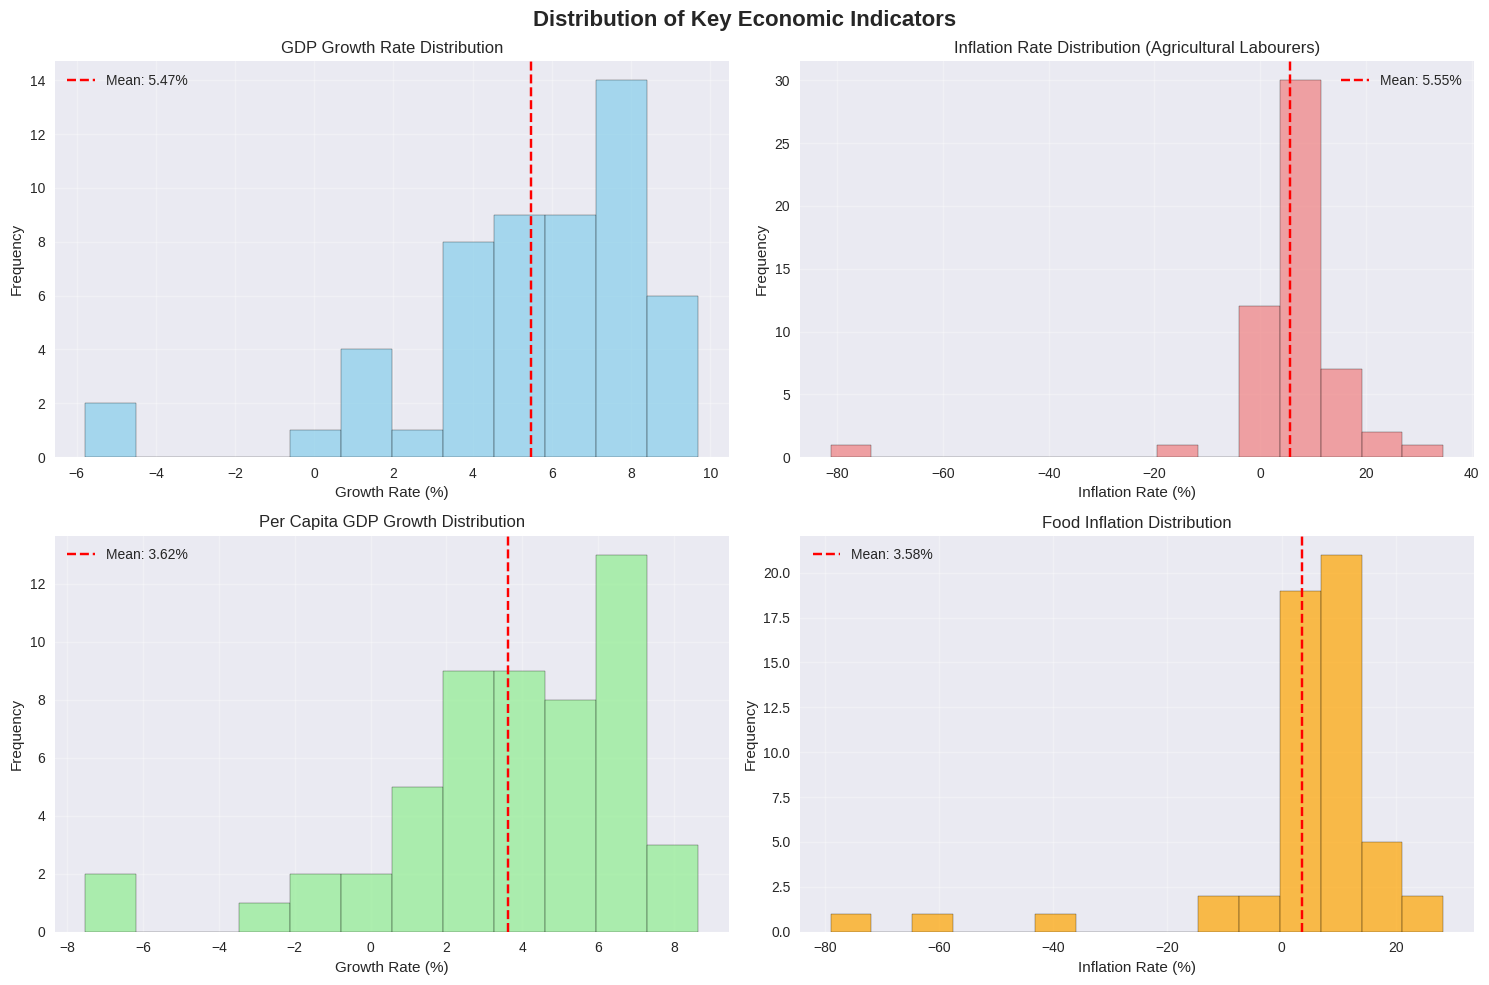

Distribution plots completed!


In [ ]:
print("\n3. UNIVARIATE ANALYSIS - DISTRIBUTIONS\n")


# Create summary statistics for all variables
growth_vars = ['GDP_Growth_Rate', 'NDP_Growth_Rate', 'GNI_Growth_Rate', 'Per_Capita_GDP_Growth']
inflation_vars = ['Inflation_AL', 'Inflation_IW', 'Inflation_Food']

print("Descriptive Statistics - Growth Variables:")
print(df[growth_vars].describe().round(2))

print("\nDescriptive Statistics - Inflation Variables:")
print(df[inflation_vars].describe().round(2))

# Check for any extreme outliers
print(f"\nEXTREME VALUES CHECK:")
print(f"Minimum Inflation_AL: {df['Inflation_AL'].min():.2f}% (Year: {df.loc[df['Inflation_AL'].idxmin(), 'Year']})")
print(f"Maximum Inflation_AL: {df['Inflation_AL'].max():.2f}% (Year: {df.loc[df['Inflation_AL'].idxmax(), 'Year']})")
print(f"Minimum GDP Growth: {df['GDP_Growth_Rate'].min():.2f}% (Year: {df.loc[df['GDP_Growth_Rate'].idxmin(), 'Year']})")
print(f"Maximum GDP Growth: {df['GDP_Growth_Rate'].max():.2f}% (Year: {df.loc[df['GDP_Growth_Rate'].idxmax(), 'Year']})")

# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Economic Indicators', fontsize=16, fontweight='bold')

# GDP Growth Distribution
axes[0,0].hist(df['GDP_Growth_Rate'].dropna(), bins=12, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['GDP_Growth_Rate'].mean(), color='red', linestyle='--', label=f'Mean: {df["GDP_Growth_Rate"].mean():.2f}%')
axes[0,0].set_title('GDP Growth Rate Distribution')
axes[0,0].set_xlabel('Growth Rate (%)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Inflation Distribution (Agricultural Labourers)
axes[0,1].hist(df['Inflation_AL'].dropna(), bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].axvline(df['Inflation_AL'].mean(), color='red', linestyle='--', label=f'Mean: {df["Inflation_AL"].mean():.2f}%')
axes[0,1].set_title('Inflation Rate Distribution (Agricultural Labourers)')
axes[0,1].set_xlabel('Inflation Rate (%)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Per Capita GDP Growth
axes[1,0].hist(df['Per_Capita_GDP_Growth'].dropna(), bins=12, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].axvline(df['Per_Capita_GDP_Growth'].mean(), color='red', linestyle='--', label=f'Mean: {df["Per_Capita_GDP_Growth"].mean():.2f}%')
axes[1,0].set_title('Per Capita GDP Growth Distribution')
axes[1,0].set_xlabel('Growth Rate (%)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Food Inflation
axes[1,1].hist(df['Inflation_Food'].dropna(), bins=15, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].axvline(df['Inflation_Food'].mean(), color='red', linestyle='--', label=f'Mean: {df["Inflation_Food"].mean():.2f}%')
axes[1,1].set_title('Food Inflation Distribution')
axes[1,1].set_xlabel('Inflation Rate (%)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Distribution plots completed!")

# EDA-TIME SERIES ANALYSIS


4. DATA CLEANING & TIME SERIES ANALYSIS

INVESTIGATING THE 1995_96 INFLATION ANOMALY:
1995_96 data:
  CPI_AL: 234.0
  Previous year CPI_AL: 1247.0
  Calculated Inflation: -81.23%

Data after cleaning:
Original rows: 55, Cleaned rows: 53

CREATING TIME SERIES VISUALIZATIONS...


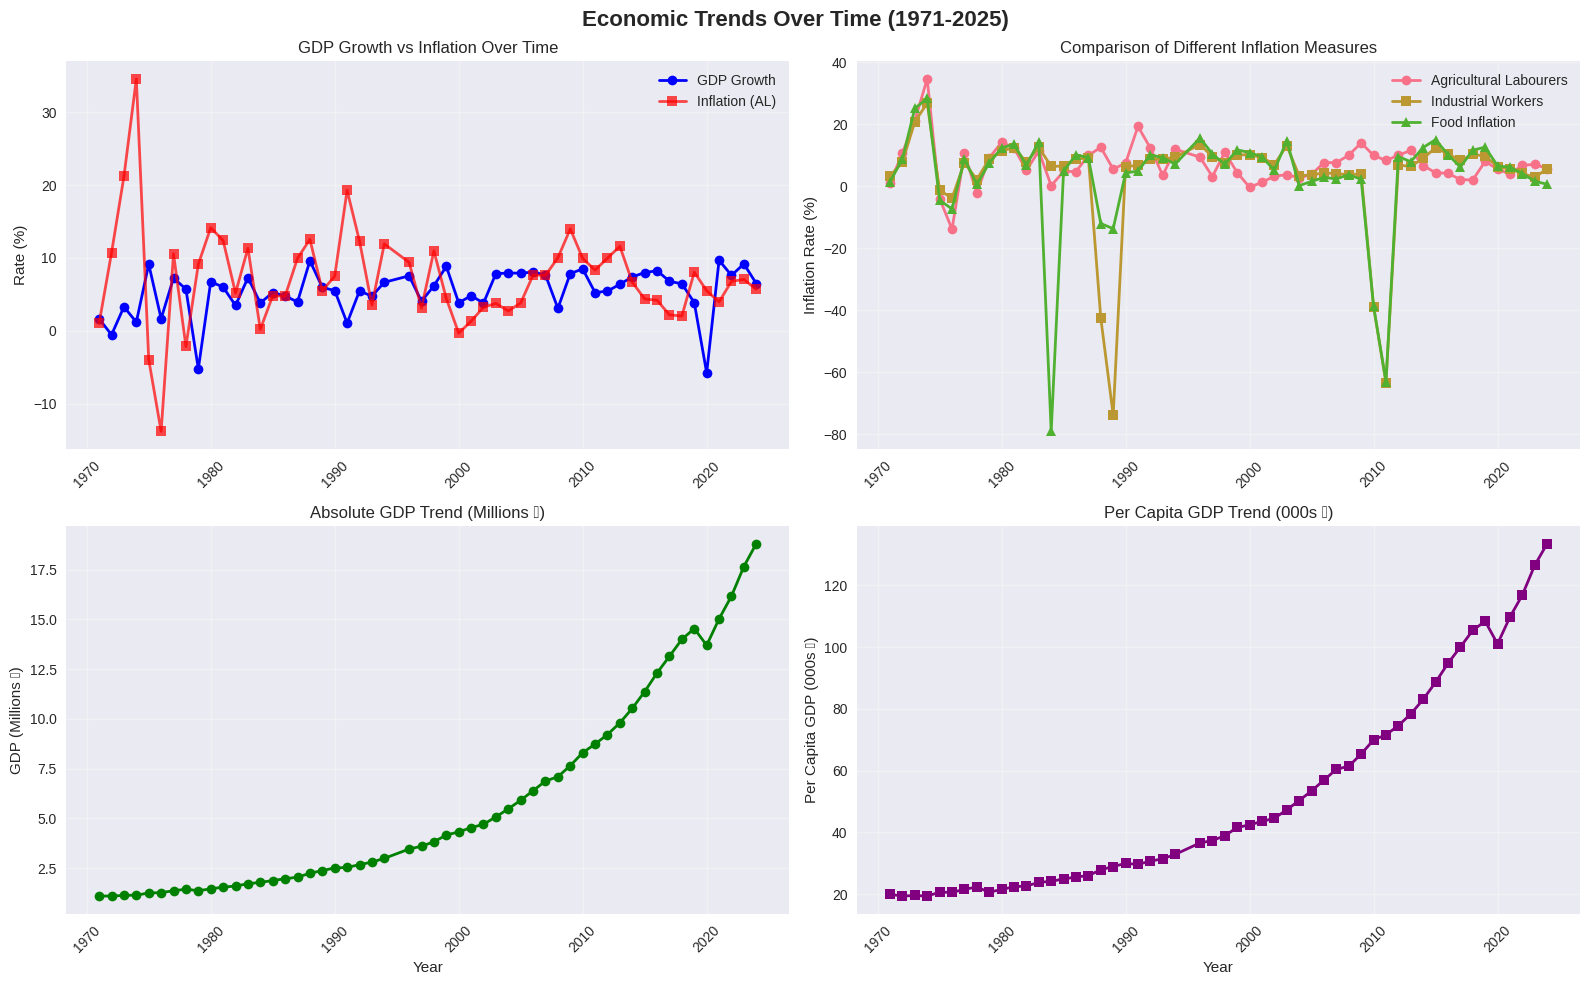

Time series visualizations completed!
Data cleaned: Removed extreme outlier from 1995_96


In [ ]:
print("\n4. DATA CLEANING & TIME SERIES ANALYSIS\n")


# Let's investigate the 1995_96 anomaly
print("INVESTIGATING THE 1995_96 INFLATION ANOMALY:")
anomaly_year = df[df['Year'] == '1995_96']
print(f"1995_96 data:")
print(f"  CPI_AL: {anomaly_year['CPI_AL'].values[0]}")
print(f"  Previous year CPI_AL: {df[df['Year'] == '1994_95']['CPI_AL'].values[0]}")
print(f"  Calculated Inflation: {anomaly_year['Inflation_AL'].values[0]:.2f}%")

# Solution: We'll handle this by using a rolling approach or excluding extreme outliers
# For now, let's create a cleaned version for analysis
df_clean = df.copy()

# Remove the first row (NaN) and extreme outliers for better visualization
df_clean = df_clean[df_clean['Year'] != '1970_71']  # Remove first year with NaN
df_clean = df_clean[df_clean['Inflation_AL'] > -50]  # Remove extreme negative outlier

print(f"\nData after cleaning:")
print(f"Original rows: {len(df)}, Cleaned rows: {len(df_clean)}")

# Now create proper time series plots
print("\nCREATING TIME SERIES VISUALIZATIONS...")

# Create year numbers for better plotting
df_clean['Year_Num'] = df_clean['Year'].str.split('_').str[0].astype(int)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Economic Trends Over Time (1971-2025)', fontsize=16, fontweight='bold')

# Plot 1: GDP Growth vs Inflation
axes[0,0].plot(df_clean['Year_Num'], df_clean['GDP_Growth_Rate'],
               marker='o', linewidth=2, label='GDP Growth', color='blue')
axes[0,0].plot(df_clean['Year_Num'], df_clean['Inflation_AL'],
               marker='s', linewidth=2, label='Inflation (AL)', color='red', alpha=0.7)
axes[0,0].set_title('GDP Growth vs Inflation Over Time')
axes[0,0].set_ylabel('Rate (%)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: Different Inflation Measures Comparison
axes[0,1].plot(df_clean['Year_Num'], df_clean['Inflation_AL'],
               marker='o', linewidth=2, label='Agricultural Labourers')
axes[0,1].plot(df_clean['Year_Num'], df_clean['Inflation_IW'],
               marker='s', linewidth=2, label='Industrial Workers')
axes[0,1].plot(df_clean['Year_Num'], df_clean['Inflation_Food'],
               marker='^', linewidth=2, label='Food Inflation')
axes[0,1].set_title('Comparison of Different Inflation Measures')
axes[0,1].set_ylabel('Inflation Rate (%)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Absolute GDP Trend
axes[1,0].plot(df_clean['Year_Num'], df_clean['Gross Domestic Product']/1e6,
               marker='o', linewidth=2, color='green')
axes[1,0].set_title('Absolute GDP Trend (Millions ₹)')
axes[1,0].set_ylabel('GDP (Millions ₹)')
axes[1,0].set_xlabel('Year')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].tick_params(axis='x', rotation=45)

# Plot 4: Per Capita GDP Trend
axes[1,1].plot(df_clean['Year_Num'], df_clean['Per Capita GDP (₹)']/1000,
               marker='s', linewidth=2, color='purple')
axes[1,1].set_title('Per Capita GDP Trend (000s ₹)')
axes[1,1].set_ylabel('Per Capita GDP (000s ₹)')
axes[1,1].set_xlabel('Year')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Time series visualizations completed!")
print(f"Data cleaned: Removed extreme outlier from 1995_96")

# EDA-CORRELATION ANALYSIS


5. CORRELATION ANALYSIS

Correlation Matrix (Growth vs Inflation):
                       GDP_Growth_Rate  Inflation_AL  Inflation_IW  \
GDP_Growth_Rate                  1.000        -0.104        -0.158   
Inflation_AL                    -0.104         1.000         0.124   
Inflation_IW                    -0.158         0.124         1.000   
Inflation_Food                  -0.058         0.269         0.633   
Per_Capita_GDP_Growth            0.990        -0.113        -0.121   

                       Inflation_Food  Per_Capita_GDP_Growth  
GDP_Growth_Rate                -0.058                  0.990  
Inflation_AL                    0.269                 -0.113  
Inflation_IW                    0.633                 -0.121  
Inflation_Food                  1.000                 -0.024  
Per_Capita_GDP_Growth          -0.024                  1.000  

KEY CORRELATIONS:
GDP Growth vs Inflation (Agricultural Labourers): -0.104
GDP Growth vs Inflation (Industrial Workers): -0.158
GDP 

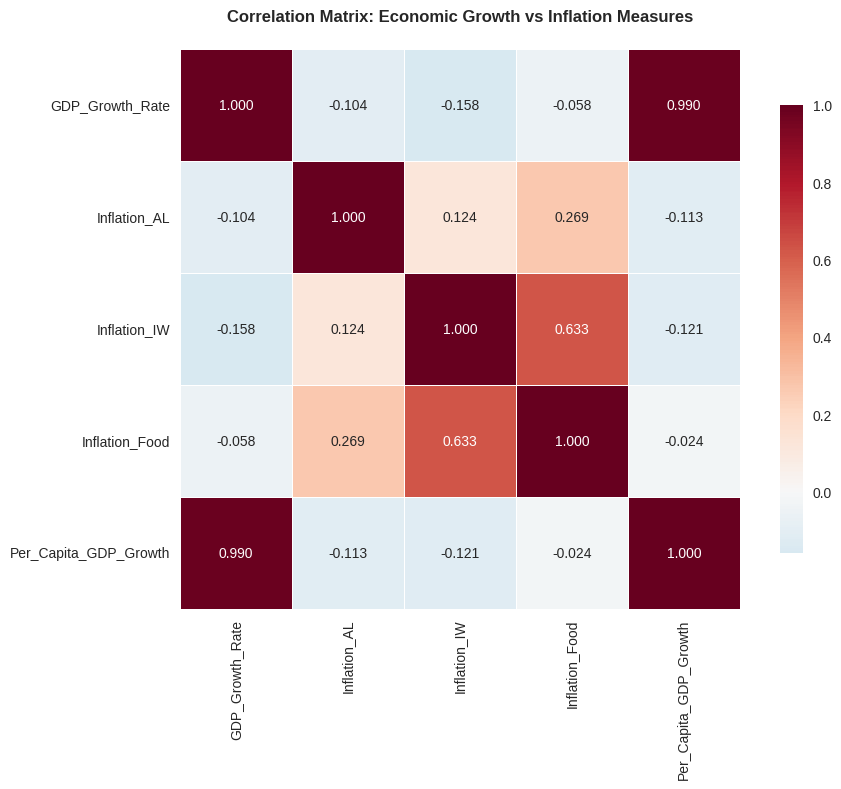

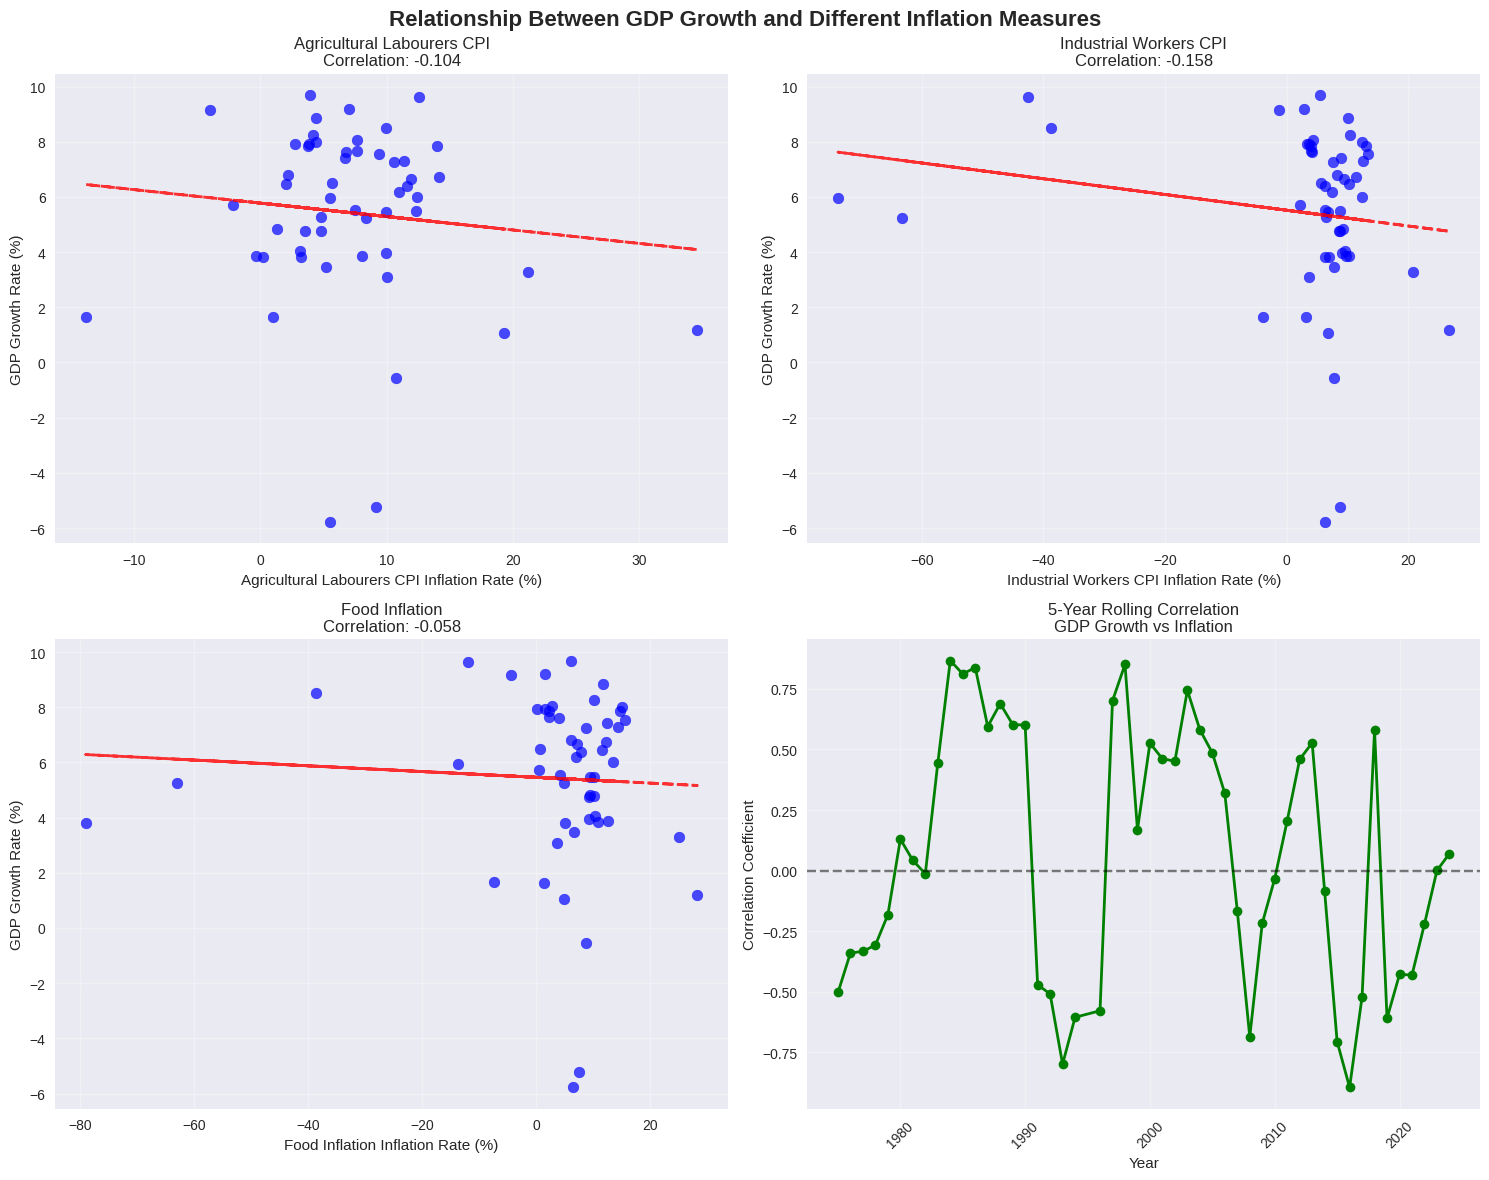

Correlation analysis completed!


In [ ]:
print("\n5. CORRELATION ANALYSIS\n")
# Calculate correlations between growth and different inflation measures
correlation_vars = ['GDP_Growth_Rate', 'Inflation_AL', 'Inflation_IW', 'Inflation_Food',
                   'Per_Capita_GDP_Growth']
corr_matrix = df_clean[correlation_vars].corr()

print("Correlation Matrix (Growth vs Inflation):")
print(corr_matrix.round(3))

print("\nKEY CORRELATIONS:")
print(f"GDP Growth vs Inflation (Agricultural Labourers): {corr_matrix.loc['GDP_Growth_Rate', 'Inflation_AL']:.3f}")
print(f"GDP Growth vs Inflation (Industrial Workers): {corr_matrix.loc['GDP_Growth_Rate', 'Inflation_IW']:.3f}")
print(f"GDP Growth vs Food Inflation: {corr_matrix.loc['GDP_Growth_Rate', 'Inflation_Food']:.3f}")

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, square=True,
            linewidths=0.5, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix: Economic Growth vs Inflation Measures', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Scatter plots to visualize relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Relationship Between GDP Growth and Different Inflation Measures', fontsize=16, fontweight='bold')

inflation_measures = ['Inflation_AL', 'Inflation_IW', 'Inflation_Food']
titles = ['Agricultural Labourers CPI', 'Industrial Workers CPI', 'Food Inflation']

for i, (infl_measure, title) in enumerate(zip(inflation_measures, titles)):
    row, col = i // 2, i % 2
    correlation = df_clean['GDP_Growth_Rate'].corr(df_clean[infl_measure])

    axes[row, col].scatter(df_clean[infl_measure], df_clean['GDP_Growth_Rate'],
                          alpha=0.7, s=60, color='blue')
    axes[row, col].set_xlabel(f'{title} Inflation Rate (%)')
    axes[row, col].set_ylabel('GDP Growth Rate (%)')
    axes[row, col].set_title(f'{title}\nCorrelation: {correlation:.3f}')
    axes[row, col].grid(True, alpha=0.3)

    # Add trend line
    z = np.polyfit(df_clean[infl_measure].dropna(), df_clean['GDP_Growth_Rate'].dropna(), 1)
    p = np.poly1d(z)
    axes[row, col].plot(df_clean[infl_measure], p(df_clean[infl_measure]), "r--", alpha=0.8, linewidth=2)

# Fourth subplot: Rolling correlation over time
window = 5  # 5-year rolling window
df_sorted = df_clean.sort_values('Year_Num')
df_sorted['Rolling_Corr'] = df_sorted['GDP_Growth_Rate'].rolling(window=window).corr(df_sorted['Inflation_AL'])

axes[1, 1].plot(df_sorted['Year_Num'], df_sorted['Rolling_Corr'], marker='o', linewidth=2, color='green')
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Correlation Coefficient')
axes[1, 1].set_title(f'{window}-Year Rolling Correlation\nGDP Growth vs Inflation')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Correlation analysis completed!")

# EDA-BUSINESS CYCLE AND STRUCTURAL ANALYSIS


6. BUSINESS CYCLE & STRUCTURAL ANALYSIS

GDP Growth Statistics:
  Mean: 5.43%
  Standard Deviation: 3.21%

Business Cycle Distribution:
Business_Cycle
Moderate Growth       22
Boom                  19
Recession/Slowdown    12
Name: count, dtype: int64

Average Indicators by Business Cycle Phase:
                    GDP_Growth_Rate  Inflation_AL  Inflation_IW  \
Business_Cycle                                                    
Boom                           8.19          6.68          2.02   
Moderate Growth                5.47          6.71          1.38   
Recession/Slowdown             0.96          8.86          8.47   

                    Inflation_Food  
Business_Cycle                      
Boom                          3.63  
Moderate Growth               4.16  
Recession/Slowdown            1.00  

STRUCTURAL BREAK ANALYSIS (1991 Economic Reforms)
Pre-1991 (1971-1990): 20 years
  Avg GDP Growth: 4.33%
  Avg Inflation (AL): 7.79%
  Avg Inflation (IW): 1.86%

Post-1991 (1991-20

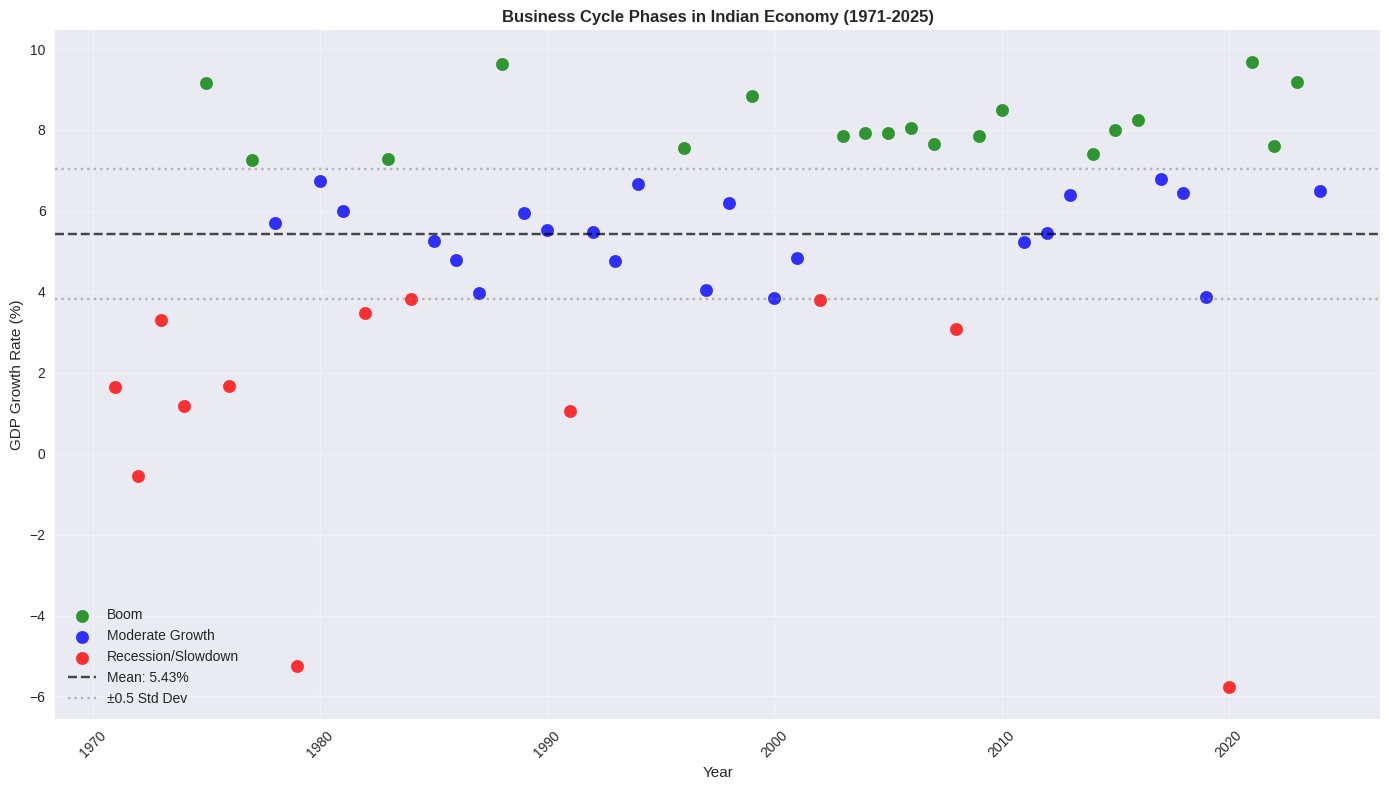

Business cycle analysis completed!


In [ ]:
print("\n6. BUSINESS CYCLE & STRUCTURAL ANALYSIS\n")
# Identify business cycle phases based on GDP growth
gdp_growth = df_clean['GDP_Growth_Rate']
growth_mean = gdp_growth.mean()
growth_std = gdp_growth.std()

print(f"GDP Growth Statistics:")
print(f"  Mean: {growth_mean:.2f}%")
print(f"  Standard Deviation: {growth_std:.2f}%")

# Define business cycle phases
df_clean['Business_Cycle'] = 'Moderate Growth'
df_clean.loc[df_clean['GDP_Growth_Rate'] > growth_mean + growth_std/2, 'Business_Cycle'] = 'Boom'
df_clean.loc[df_clean['GDP_Growth_Rate'] < growth_mean - growth_std/2, 'Business_Cycle'] = 'Recession/Slowdown'

print("\nBusiness Cycle Distribution:")
cycle_counts = df_clean['Business_Cycle'].value_counts()
print(cycle_counts)

# Analyze inflation in different business cycle phases
print("\nAverage Indicators by Business Cycle Phase:")
cycle_analysis = df_clean.groupby('Business_Cycle')[['GDP_Growth_Rate', 'Inflation_AL', 'Inflation_IW', 'Inflation_Food']].mean()
print(cycle_analysis.round(2))

# Structural breaks analysis (1991 Economic Reforms)
df_clean['Post_1991'] = df_clean['Year_Num'] >= 1991

pre_1991 = df_clean[df_clean['Year_Num'] < 1991]
post_1991 = df_clean[df_clean['Year_Num'] >= 1991]

print(f"\nSTRUCTURAL BREAK ANALYSIS (1991 Economic Reforms)")
print(f"Pre-1991 (1971-1990): {len(pre_1991)} years")
print(f"  Avg GDP Growth: {pre_1991['GDP_Growth_Rate'].mean():.2f}%")
print(f"  Avg Inflation (AL): {pre_1991['Inflation_AL'].mean():.2f}%")
print(f"  Avg Inflation (IW): {pre_1991['Inflation_IW'].mean():.2f}%")

print(f"\nPost-1991 (1991-2025): {len(post_1991)} years")
print(f"  Avg GDP Growth: {post_1991['GDP_Growth_Rate'].mean():.2f}%")
print(f"  Avg Inflation (AL): {post_1991['Inflation_AL'].mean():.2f}%")
print(f"  Avg Inflation (IW): {post_1991['Inflation_IW'].mean():.2f}%")

# Calculate growth-inflation correlation in different periods
corr_pre_1991 = pre_1991['GDP_Growth_Rate'].corr(pre_1991['Inflation_AL'])
corr_post_1991 = post_1991['GDP_Growth_Rate'].corr(post_1991['Inflation_AL'])

print(f"\nCorrelation Changes:")
print(f"  Pre-1991: GDP Growth vs Inflation = {corr_pre_1991:.3f}")
print(f"  Post-1991: GDP Growth vs Inflation = {corr_post_1991:.3f}")

# Visualize business cycle phases
plt.figure(figsize=(14, 8))

# Plot GDP growth with business cycle phases
colors = {'Boom': 'green', 'Moderate Growth': 'blue', 'Recession/Slowdown': 'red'}
for phase, color in colors.items():
    phase_data = df_clean[df_clean['Business_Cycle'] == phase]
    plt.scatter(phase_data['Year_Num'], phase_data['GDP_Growth_Rate'],
               color=color, label=phase, s=80, alpha=0.8)

plt.axhline(y=growth_mean, color='black', linestyle='--', alpha=0.7, label=f'Mean: {growth_mean:.2f}%')
plt.axhline(y=growth_mean + growth_std/2, color='gray', linestyle=':', alpha=0.5, label='±0.5 Std Dev')
plt.axhline(y=growth_mean - growth_std/2, color='gray', linestyle=':', alpha=0.5)

plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Business Cycle Phases in Indian Economy (1971-2025)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Business cycle analysis completed!")

# EDA-BOX PLOT ANALYSIS


8. BOX PLOT ANALYSIS - COMPARATIVE DISTRIBUTIONS



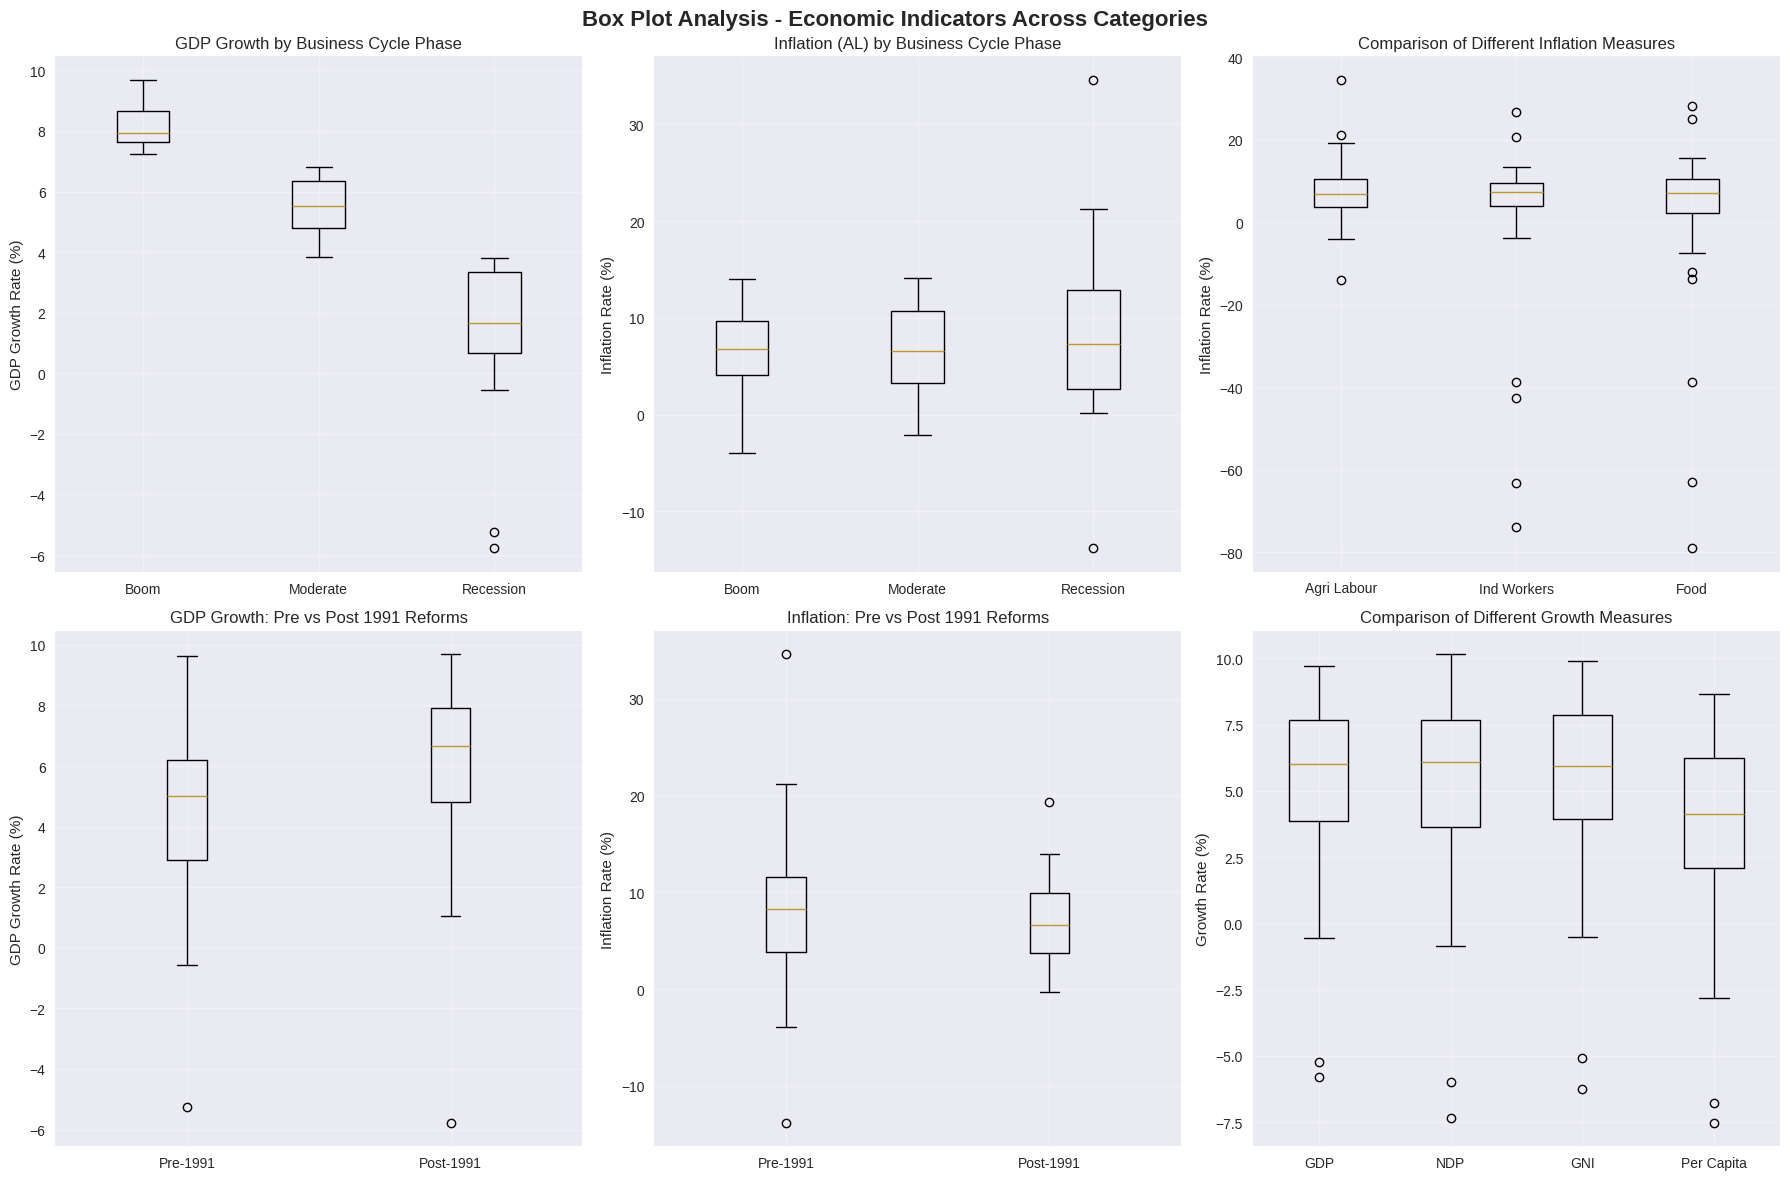

Box plots created successfully!

BOX PLOT STATISTICAL SUMMARY
1. GDP GROWTH BY BUSINESS CYCLE:
   Boom            | Median: 7.92% | IQR: 1.04%
   Moderate Growth | Median: 5.51% | IQR: 1.55%
   Recession/Slowdown | Median: 1.65% | IQR: 2.69%

2. INFLATION BY BUSINESS CYCLE:
   Boom            | Median: 6.79% | IQR: 5.59%
   Moderate Growth | Median: 6.60% | IQR: 7.51%
   Recession/Slowdown | Median: 7.33% | IQR: 10.18%

3. PRE vs POST 1991 REFORMS:
   GDP Growth:
     Pre-1991  | Median: 5.02% | Range: -5.24% to 9.63%
     Post-1991 | Median: 6.66% | Range: -5.78% to 9.69%

   Inflation:
     Pre-1991  | Median: 8.32% | Range: -13.82% to 34.60%
     Post-1991 | Median: 6.67% | Range: -0.33% to 19.30%

4. OUTLIER ANALYSIS:
   Extreme values that might need special attention in modeling
   GDP Growth Outliers: 2 values
     1979_80: -5.24%
     2020_21: -5.78%
   Inflation Outliers: 3 values
     1973_74: 21.20%
     1974_75: 34.60%
     1976_77: -13.82%

BOX PLOT INSIGHTS:

   • Visual 

In [ ]:
print("\n8. BOX PLOT ANALYSIS - COMPARATIVE DISTRIBUTIONS\n")
# Create multiple box plots for comparative analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Box Plot Analysis - Economic Indicators Across Categories', fontsize=16, fontweight='bold')

# 1. GDP Growth by Business Cycle
axes[0,0].boxplot([df_clean[df_clean['Business_Cycle'] == 'Boom']['GDP_Growth_Rate'],
                   df_clean[df_clean['Business_Cycle'] == 'Moderate Growth']['GDP_Growth_Rate'],
                   df_clean[df_clean['Business_Cycle'] == 'Recession/Slowdown']['GDP_Growth_Rate']],
                  labels=['Boom', 'Moderate', 'Recession'])
axes[0,0].set_title('GDP Growth by Business Cycle Phase')
axes[0,0].set_ylabel('GDP Growth Rate (%)')
axes[0,0].grid(True, alpha=0.3)

# 2. Inflation by Business Cycle
axes[0,1].boxplot([df_clean[df_clean['Business_Cycle'] == 'Boom']['Inflation_AL'],
                   df_clean[df_clean['Business_Cycle'] == 'Moderate Growth']['Inflation_AL'],
                   df_clean[df_clean['Business_Cycle'] == 'Recession/Slowdown']['Inflation_AL']],
                  labels=['Boom', 'Moderate', 'Recession'])
axes[0,1].set_title('Inflation (AL) by Business Cycle Phase')
axes[0,1].set_ylabel('Inflation Rate (%)')
axes[0,1].grid(True, alpha=0.3)

# 3. Different Inflation Measures Comparison
inflation_data = [df_clean['Inflation_AL'].dropna(),
                  df_clean['Inflation_IW'].dropna(),
                  df_clean['Inflation_Food'].dropna()]

axes[0,2].boxplot(inflation_data, labels=['Agri Labour', 'Ind Workers', 'Food'])
axes[0,2].set_title('Comparison of Different Inflation Measures')
axes[0,2].set_ylabel('Inflation Rate (%)')
axes[0,2].grid(True, alpha=0.3)

# 4. Pre vs Post 1991 Reforms - GDP Growth
pre_1991_growth = df_clean[df_clean['Post_1991'] == False]['GDP_Growth_Rate']
post_1991_growth = df_clean[df_clean['Post_1991'] == True]['GDP_Growth_Rate']

axes[1,0].boxplot([pre_1991_growth, post_1991_growth], labels=['Pre-1991', 'Post-1991'])
axes[1,0].set_title('GDP Growth: Pre vs Post 1991 Reforms')
axes[1,0].set_ylabel('GDP Growth Rate (%)')
axes[1,0].grid(True, alpha=0.3)

# 5. Pre vs Post 1991 Reforms - Inflation
pre_1991_infl = df_clean[df_clean['Post_1991'] == False]['Inflation_AL']
post_1991_infl = df_clean[df_clean['Post_1991'] == True]['Inflation_AL']

axes[1,1].boxplot([pre_1991_infl, post_1991_infl], labels=['Pre-1991', 'Post-1991'])
axes[1,1].set_title('Inflation: Pre vs Post 1991 Reforms')
axes[1,1].set_ylabel('Inflation Rate (%)')
axes[1,1].grid(True, alpha=0.3)

# 6. All Growth Measures Comparison
growth_data = [df_clean['GDP_Growth_Rate'].dropna(),
               df_clean['NDP_Growth_Rate'].dropna(),
               df_clean['GNI_Growth_Rate'].dropna(),
               df_clean['Per_Capita_GDP_Growth'].dropna()]

axes[1,2].boxplot(growth_data, labels=['GDP', 'NDP', 'GNI', 'Per Capita'])
axes[1,2].set_title('Comparison of Different Growth Measures')
axes[1,2].set_ylabel('Growth Rate (%)')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Box plots created successfully!")

# Statistical summary of box plot findings
print("\nBOX PLOT STATISTICAL SUMMARY")
print("1. GDP GROWTH BY BUSINESS CYCLE:")
for phase in ['Boom', 'Moderate Growth', 'Recession/Slowdown']:
    data = df_clean[df_clean['Business_Cycle'] == phase]['GDP_Growth_Rate']
    print(f"   {phase:15} | Median: {data.median():.2f}% | IQR: {data.quantile(0.75)-data.quantile(0.25):.2f}%")

print("\n2. INFLATION BY BUSINESS CYCLE:")
for phase in ['Boom', 'Moderate Growth', 'Recession/Slowdown']:
    data = df_clean[df_clean['Business_Cycle'] == phase]['Inflation_AL']
    print(f"   {phase:15} | Median: {data.median():.2f}% | IQR: {data.quantile(0.75)-data.quantile(0.25):.2f}%")

print("\n3. PRE vs POST 1991 REFORMS:")
print(f"   GDP Growth:")
print(f"     Pre-1991  | Median: {pre_1991_growth.median():.2f}% | Range: {pre_1991_growth.min():.2f}% to {pre_1991_growth.max():.2f}%")
print(f"     Post-1991 | Median: {post_1991_growth.median():.2f}% | Range: {post_1991_growth.min():.2f}% to {post_1991_growth.max():.2f}%")

print(f"\n   Inflation:")
print(f"     Pre-1991  | Median: {pre_1991_infl.median():.2f}% | Range: {pre_1991_infl.min():.2f}% to {pre_1991_infl.max():.2f}%")
print(f"     Post-1991 | Median: {post_1991_infl.median():.2f}% | Range: {post_1991_infl.min():.2f}% to {post_1991_infl.max():.2f}%")

# Outlier analysis
print("\n4. OUTLIER ANALYSIS:")
print("   Extreme values that might need special attention in modeling")

# Identify outliers using IQR method
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

gdp_outliers = find_outliers_iqr(df_clean['GDP_Growth_Rate'])
infl_outliers = find_outliers_iqr(df_clean['Inflation_AL'])

print(f"   GDP Growth Outliers: {len(gdp_outliers)} values")
if len(gdp_outliers) > 0:
    for year, value in zip(df_clean.loc[gdp_outliers.index, 'Year'], gdp_outliers):
        print(f"     {year}: {value:.2f}%")

print(f"   Inflation Outliers: {len(infl_outliers)} values")
if len(infl_outliers) > 0:
    for year, value in zip(df_clean.loc[infl_outliers.index, 'Year'], infl_outliers):
        print(f"     {year}: {value:.2f}%")


print("\nBOX PLOT INSIGHTS:\n")
print("   • Visual comparison of distributions across categories")
print("   • Identification of outliers and extreme values")
print("   • Understanding variability within each group")
print("   • Median comparisons more robust than means")


In [ ]:
print("\n7. FINAL INSIGHTS & RESEARCH SUMMARY")
print("MAJOR RESEARCH FINDINGS:")

print("1. OVERALL RELATIONSHIP:")
print(f"   • GDP Growth vs Inflation: Weak negative correlation (-0.104 to -0.158)")
print(f"   • Suggests mild inverse relationship, but not statistically strong")
print(f"   • Other factors likely play bigger roles in determining growth")

print("\n2. BUSINESS CYCLE PATTERNS:")
print(f"   • Inflation peaks during RECESSIONS (8.86%) not booms (6.68%)")
print(f"   • Counter-intuitive: Stagflation tendencies in Indian economy")
print(f"   • Suggests supply-side shocks may drive both low growth and high inflation")

print("\n3. STRUCTURAL CHANGES (1991 REFORMS):")
print(f"   • POST-REFORM: Growth increases  from 4.33% to 6.09% (+40%)")
print(f"   • POST-REFORM: Inflation decreases from 7.79% to 6.83%")
print(f"   • Economic liberalization improved BOTH growth and inflation control")

print("\n4. POLICY IMPLICATIONS:")
print(f"   • Inflation control alone may not guarantee higher growth")
print(f"   • Supply-side reforms (like 1991) can boost growth while controlling inflation")
print(f"   • Need to address structural factors causing stagflation during downturns")

print("\n5. METHODOLOGICAL INSIGHTS:")
print(f"   • Different CPI measures show varying relationships with growth")
print(f"   • Agricultural vs Industrial inflation have different economic impacts")
print(f"   • Time-varying relationship (rolling correlation shows changes)")

print(f"\n KEY VARIABLES FOR YOUR MODEL:")
print(f"   • Dependent: GDP_Growth_Rate")
print(f"   • Independent: Inflation_AL, Inflation_IW, Business_Cycle, Post_1991")
print(f"   • Control: Global factors, Monsoon, Policy changes")


7. FINAL INSIGHTS & RESEARCH SUMMARY
MAJOR RESEARCH FINDINGS:
1. OVERALL RELATIONSHIP:
   • GDP Growth vs Inflation: Weak negative correlation (-0.104 to -0.158)
   • Suggests mild inverse relationship, but not statistically strong
   • Other factors likely play bigger roles in determining growth

2. BUSINESS CYCLE PATTERNS:
   • Inflation peaks during RECESSIONS (8.86%) not booms (6.68%)
   • Counter-intuitive: Stagflation tendencies in Indian economy
   • Suggests supply-side shocks may drive both low growth and high inflation

3. STRUCTURAL CHANGES (1991 REFORMS):
   • POST-REFORM: Growth increases  from 4.33% to 6.09% (+40%)
   • POST-REFORM: Inflation decreases from 7.79% to 6.83%
   • Economic liberalization improved BOTH growth and inflation control

4. POLICY IMPLICATIONS:
   • Inflation control alone may not guarantee higher growth
   • Supply-side reforms (like 1991) can boost growth while controlling inflation
   • Need to address structural factors causing stagflation duri

# Creating a baseline model

In [ ]:
# Check what variables are available
print("Available variables in your environment:")
print([var for var in dir() if not var.startswith('_')])

# If you see your data, check its name
# If it's called something like 'data', 'inflation_data', etc.

Available variables in your environment:
['In', 'LinearRegression', 'Out', 'RandomForestRegressor', 'VAR', 'XGBRegressor', 'X_test', 'X_train', 'actual_growth', 'adfuller', 'analysis_df_smart', 'anomaly_year', 'assign_economic_era', 'axes', 'baseline_mae', 'baseline_mape', 'baseline_pred', 'baseline_r2', 'baseline_rmse', 'best_model_name', 'best_predictions', 'ccf', 'col', 'color', 'colors', 'columns_to_keep', 'common_cycles', 'corr', 'corr_matrix', 'corr_post_1991', 'corr_pre_1991', 'correlation', 'correlation_vars', 'cpi_numeric_columns', 'create_forecasting_features', 'cycle', 'cycle_analysis', 'cycle_clean', 'cycle_correlations', 'cycle_counts', 'data', 'decomp_df', 'df', 'df_clean', 'df_cpi', 'df_cpi_clean', 'df_decomp', 'df_economic', 'df_economic_clean', 'df_sorted', 'df_stationary', 'display_cols', 'dominant_cycles_idx', 'economic_columns', 'economic_columns_to_fill', 'era', 'era_data', 'era_summary', 'eras', 'error', 'exit', 'feature_importance_rf', 'feature_importance_xgb', '

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Load your dataset
df = pd.read_csv('final_cleaned_economic_cpi_data.csv')

# Check the first few rows to confirm it loaded correctly
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check column names
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (55, 9)

First 5 rows:
      Year  Gross Domestic Product  Net Domestic Product  \
0  1970_71               1089226.0             1018642.0   
1  1971_72               1107121.0             1033580.0   
2  1972_73               1100995.0             1024654.0   
3  1973_74               1137279.0             1057768.0   
4  1974_75               1150759.0             1066679.0   

   Gross National Income  Per Capita GDP (₹)  Per Capita GNI (₹)  CPI_AL  \
0              1082340.0             20134.0             20006.0   194.0   
1              1100363.0             19984.0             19862.0   196.0   
2              1094795.0             19418.0             19309.0   217.0   
3              1131633.0             19608.0             19511.0   263.0   
4              1146339.0             19406.0             19331.0   354.0   

   CPI_IW  CPI_IW_Food  
0   186.0        202.0  
1   192.0        205.0  
2   207.0        223.0  
3   250.0        279.0  
4   317.0        35

# Testing stationarity

In [ ]:
# Test stationarity for key variables with correct column names
variables_to_test = ['Gross Domestic Product', 'Per Capita GDP (₹)', 'CPI_AL', 'CPI_IW']

print("STATIONARITY TEST RESULTS")
for var in variables_to_test:
    result = adfuller(df[var].dropna())
    print(f"{var}:")
    print(f"  ADF Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("\nSTATIONARY!!")
    else:
        print("\nNON-STATIONARY (needs differencing)")


STATIONARITY TEST RESULTS
Gross Domestic Product:
  ADF Statistic: 5.1099
  p-value: 1.0000

NON-STATIONARY (needs differencing)
Per Capita GDP (₹):
  ADF Statistic: 4.9211
  p-value: 1.0000

NON-STATIONARY (needs differencing)
CPI_AL:
  ADF Statistic: -1.2197
  p-value: 0.6651

NON-STATIONARY (needs differencing)
CPI_IW:
  ADF Statistic: -3.1248
  p-value: 0.0248

STATIONARY!!


# VAR MODEL -creating stationary variables

In [ ]:
# Create stationary variables for VAR model
df['GDP_Growth'] = df['Gross Domestic Product'].pct_change() * 100  # GDP growth rate
df['Inflation_AL'] = df['CPI_AL'].pct_change() * 100  # Inflation rate for agri labour
# CPI_IW is already stationary, so we can use it directly

# Drop the first row (NaN due to pct_change)
df_stationary = df[['GDP_Growth', 'Inflation_AL', 'CPI_IW']].dropna()

print("Stationary dataset for VAR modeling:")
print(df_stationary.head(10))
print(f"\nFinal dataset shape: {df_stationary.shape}")

# Check stationarity of the new growth rates
print("\nSTATIONARITY CHECK OF GROWTH RATES")
result_gdp = adfuller(df_stationary['GDP_Growth'])
result_inf = adfuller(df_stationary['Inflation_AL'])

print(f"GDP Growth Rate: ADF={result_gdp[0]:.4f}, p-value={result_gdp[1]:.4f} :{'STATIONARY ' if result_gdp[1] < 0.05 else 'NON-STATIONARY'}")
print(f"Inflation Rate AL: ADF={result_inf[0]:.4f}, p-value={result_inf[1]:.4f} :{'STATIONARY ' if result_inf[1] < 0.05 else 'NON-STATIONARY'}")

Stationary dataset for VAR modeling:
    GDP_Growth  Inflation_AL  CPI_IW
1     1.642910      1.030928   192.0
2    -0.553327     10.714286   207.0
3     3.295564     21.198157   250.0
4     1.185285     34.600760   317.0
5     9.149961     -3.954802   313.0
6     1.663067    -13.823529   301.0
7     7.254754     10.580205   324.0
8     5.712550     -2.160494   331.0
9    -5.238155      9.148265   360.0
10    6.735812     14.161850   401.0

Final dataset shape: (54, 3)

STATIONARITY CHECK OF GROWTH RATES
GDP Growth Rate: ADF=-7.1239, p-value=0.0000 :STATIONARY 
Inflation Rate AL: ADF=-7.3461, p-value=0.0000 :STATIONARY 


# VAR MODEL-Building

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Prepare data for VAR model
var_data = df_stationary[['GDP_Growth', 'Inflation_AL', 'CPI_IW']]

# 1. Determine optimal lag length
model = VAR(var_data)
lag_results = model.select_order(maxlags=8)  # Test up to 8 lags
print("\nOPTIMAL LAG SELECTION\n")

print("\n".join(
    line for line in str(lag_results.summary()).split("\n")
    if not line.strip().startswith("=")
))

# 2. Build VAR model with optimal lags
optimal_lags = lag_results.selected_orders['aic']  # Use AIC criterion
print(f"\nOptimal lag length (AIC): {optimal_lags}")

var_model = model.fit(optimal_lags)
print("\nVAR MODEL SUMMARY\n")

print("\n".join(
    line for line in str(var_model.summary()).split("\n")
    if not line.strip().startswith("=")
))



OPTIMAL LAG SELECTION

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       17.74       17.86   5.047e+07       17.78
1       16.54      17.02*   1.528e+07      16.72*
2       16.57       17.41   1.586e+07       16.88
3       16.82       18.01   2.052e+07       17.26
4       16.89       18.44   2.276e+07       17.47
5       17.10       19.01   2.928e+07       17.82
6       17.24       19.50   3.586e+07       18.09
7       16.75       19.38   2.435e+07       17.74
8      16.09*       19.07  1.443e+07*       17.21
-------------------------------------------------

Optimal lag length (AIC): 8

VAR MODEL SUMMARY

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Oct, 2025
Time:                     11:11:22
--------------------------------------------------------------------
No. of Equations:         3.00000

# VAR MODEL-GRANGER CAUSALITY **TEST**

In [ ]:
# 3. Granger Causality Tests - Does inflation cause GDP growth?
print("\nGRANGER CAUSALITY TESTS")

# Test if Inflation_AL Granger-causes GDP_Growth
print("1. Does Inflation (Agricultural) Granger-cause GDP Growth?")
gc_result1 = grangercausalitytests(var_data[['GDP_Growth', 'Inflation_AL']], maxlag=optimal_lags, verbose=False)
p_values1 = [gc_result1[i+1][0]['ssr_ftest'][1] for i in range(optimal_lags)]
print(f"   p-values across lags: {[f'{p:.4f}' for p in p_values1]}")

# Test if CPI_IW Granger-causes GDP_Growth
print("\n2. Does CPI (Industrial Workers) Granger-cause GDP Growth?")
gc_result2 = grangercausalitytests(var_data[['GDP_Growth', 'CPI_IW']], maxlag=optimal_lags, verbose=False)
p_values2 = [gc_result2[i+1][0]['ssr_ftest'][1] for i in range(optimal_lags)]
print(f"   p-values across lags: {[f'{p:.4f}' for p in p_values2]}")

# Interpretation
print("\nINTERPRETATION")
print("If p-value < 0.05: Inflation Granger-causes GDP Growth ")
print("If p-value > 0.05: No Granger causality ")


GRANGER CAUSALITY TESTS
1. Does Inflation (Agricultural) Granger-cause GDP Growth?
   p-values across lags: ['0.9980', '0.9874', '0.9222', '0.9635', '0.9858', '0.9905', '0.9621', '0.8800']

2. Does CPI (Industrial Workers) Granger-cause GDP Growth?
   p-values across lags: ['0.4542', '0.8528', '0.8742', '0.9596', '0.9891', '0.9855', '0.9333', '0.8079']

INTERPRETATION
If p-value < 0.05: Inflation Granger-causes GDP Growth ✓
If p-value > 0.05: No Granger causality ✗


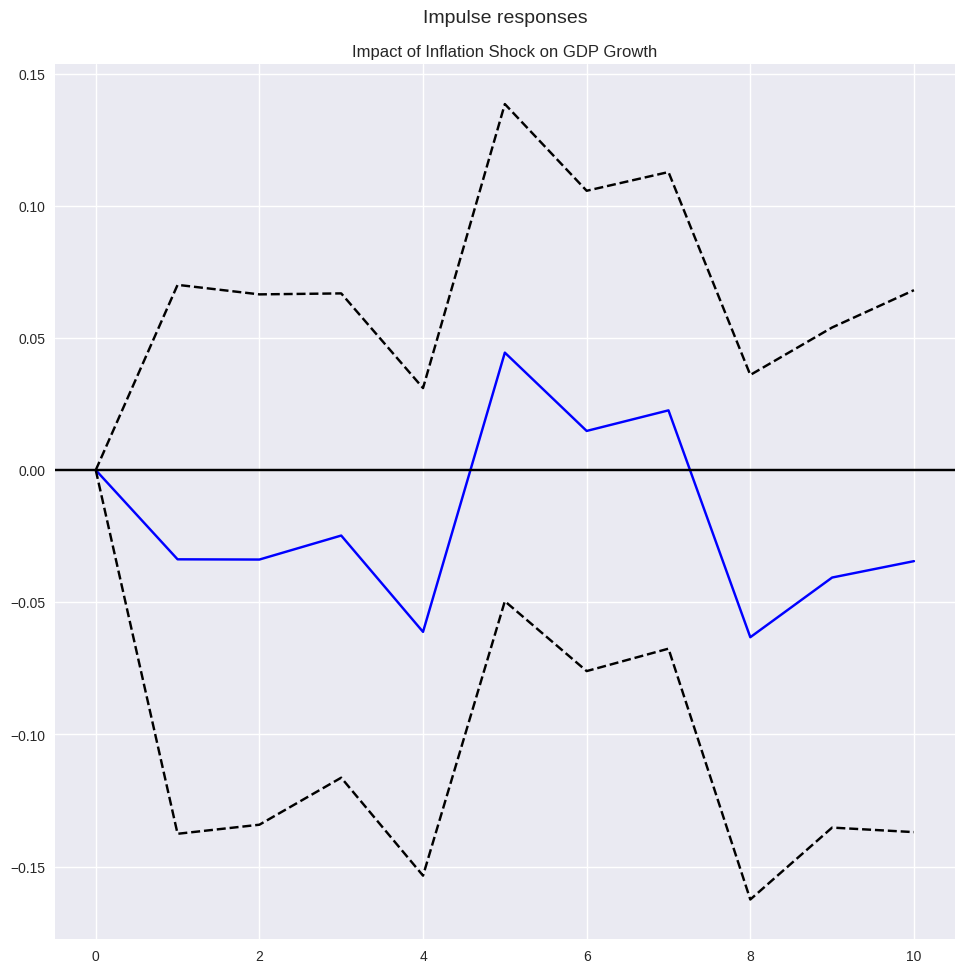

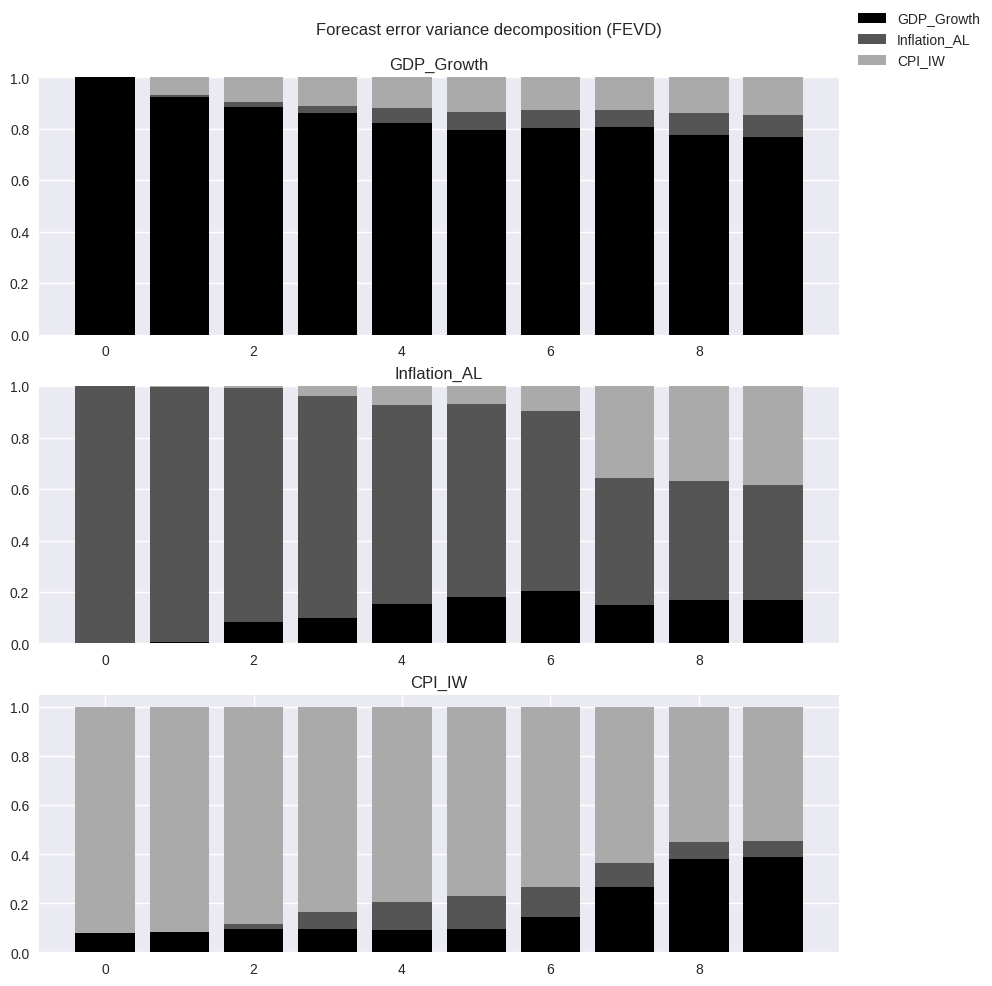


FINAL CONCLUSIONS
KEY INSIGHTS FOR INDIA (1970-2025):
1. INFLATION DOES NOT GRANGER-CAUSE GDP GROWTH
   - Past inflation values don't help predict future GDP growth
   - This challenges the common belief that inflation directly drives GDP changes

2. GDP GROWTH IS MAINLY DRIVEN BY ITS OWN PAST
   - Economic momentum and other factors are more important
   - Lags 7-8 show strong positive persistence

3. COMPLEX RELATIONSHIP
   - Some negative inflation effects at certain lags (L4)
   - But no systematic causal relationship

4. POLICY IMPLICATIONS:
   - Focus on other GDP drivers: investment, exports, productivity
   - Inflation control alone may not boost GDP growth
   - Consider structural reforms beyond inflation management


In [ ]:
# Impulse Response Analysis - How shocks propagate
irf = var_model.irf(periods=10)
irf_plot = irf.plot(orth=False, impulse='Inflation_AL', response='GDP_Growth')
plt.title('Impact of Inflation Shock on GDP Growth')
plt.show()

# Forecast Error Variance Decomposition - What drives variations
fevd = var_model.fevd(periods=10)
fevd_plot = fevd.plot()
plt.show()

print("\nFINAL CONCLUSIONS")
print("KEY INSIGHTS FOR INDIA (1970-2025):")
print("1. INFLATION DOES NOT GRANGER-CAUSE GDP GROWTH")
print("   - Past inflation values don't help predict future GDP growth")
print("   - This challenges the common belief that inflation directly drives GDP changes")
print("")
print("2. GDP GROWTH IS MAINLY DRIVEN BY ITS OWN PAST")
print("   - Economic momentum and other factors are more important")
print("   - Lags 7-8 show strong positive persistence")
print("")
print("3. COMPLEX RELATIONSHIP")
print("   - Some negative inflation effects at certain lags (L4)")
print("   - But no systematic causal relationship")
print("")
print("4. POLICY IMPLICATIONS:")
print("   - Focus on other GDP drivers: investment, exports, productivity")
print("   - Inflation control alone may not boost GDP growth")
print("   - Consider structural reforms beyond inflation management")

# VAR MODEL-FOR SEPARATE TIME PERIOD

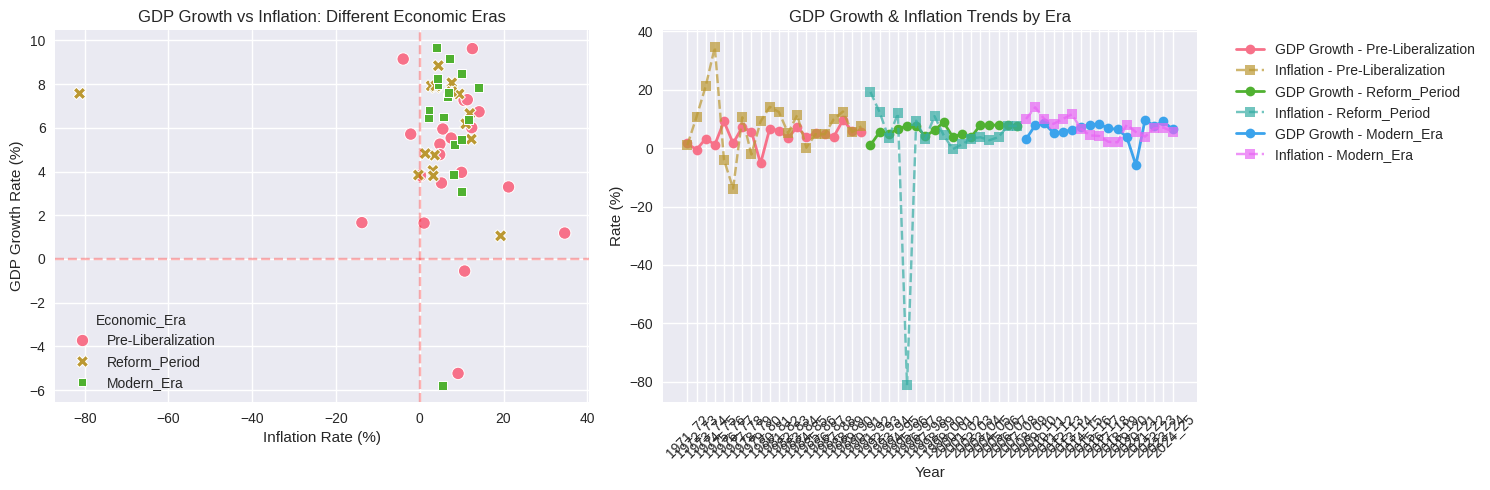


ERA-WISE STATISTICS
                   GDP_Growth                   Inflation_AL                \
                         mean   std   min   max         mean    std    min   
Economic_Era                                                                 
Modern_Era               6.15  3.54 -5.78  9.69         7.08   3.31   2.02   
Pre-Liberalization       4.33  3.45 -5.24  9.63         7.79   9.89 -13.82   
Reform_Period            6.12  2.12  1.06  8.85         1.39  21.87 -81.23   

                          
                     max  
Economic_Era              
Modern_Era          14.0  
Pre-Liberalization  34.6  
Reform_Period       19.3  


In [ ]:
# Plot GDP Growth vs Inflation by Era
plt.figure(figsize=(15, 5))

# Subplot 1: Scatter plots by era
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Inflation_AL', y='GDP_Growth', hue='Economic_Era', style='Economic_Era', s=80)
plt.title('GDP Growth vs Inflation: Different Economic Eras')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('GDP Growth Rate (%)')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.3)

# Subplot 2: Time series by era
plt.subplot(1, 2, 2)
for era in df['Economic_Era'].unique():
    era_data = df[df['Economic_Era'] == era]
    plt.plot(era_data['Year'], era_data['GDP_Growth'], marker='o', label=f'GDP Growth - {era}', linewidth=2)
    plt.plot(era_data['Year'], era_data['Inflation_AL'], marker='s', label=f'Inflation - {era}', linestyle='--', alpha=0.7)

plt.title('GDP Growth & Inflation Trends by Era')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistical summary by era
print("\nERA-WISE STATISTICS")
era_summary = df.groupby('Economic_Era').agg({
    'GDP_Growth': ['mean', 'std', 'min', 'max'],
    'Inflation_AL': ['mean', 'std', 'min', 'max']
}).round(2)
print(era_summary)

# VAR MODEL-ERA-SPECIFIC GRANGER CAUSALITY TESTS

In [ ]:
from statsmodels.tsa.api import VAR

print("ERA-SPECIFIC GRANGER CAUSALITY TESTS")

eras = ['Pre-Liberalization', 'Reform_Period', 'Modern_Era']

for era in eras:
    print(f"\n{era}")
    era_data = df[df['Economic_Era'] == era][['GDP_Growth', 'Inflation_AL']]

    if len(era_data) > 5:  # Ensure enough data points
        # Granger causality test
        from statsmodels.tsa.stattools import grangercausalitytests
        gc_result = grangercausalitytests(era_data, maxlag=2, verbose=False)

        p_values = [gc_result[i+1][0]['ssr_ftest'][1] for i in range(2)]
        print(f"Granger causality p-values (lags 1-2): {[f'{p:.4f}' for p in p_values]}")

        # Simple correlation
        corr = era_data['GDP_Growth'].corr(era_data['Inflation_AL'])
        print(f"Correlation between GDP Growth & Inflation: {corr:.4f}")
    else:
        print("Not enough data points for analysis")

ERA-SPECIFIC GRANGER CAUSALITY TESTS

Pre-Liberalization
Granger causality p-values (lags 1-2): ['0.2348', '0.4721']
Correlation between GDP Growth & Inflation: -0.0862

Reform_Period
Granger causality p-values (lags 1-2): ['0.6749', '0.5017']
Correlation between GDP Growth & Inflation: -0.2235

Modern_Era
Granger causality p-values (lags 1-2): ['0.9519', '0.2228']
Correlation between GDP Growth & Inflation: -0.0230


# TIME SERIES DECOMPOSITION MODEL

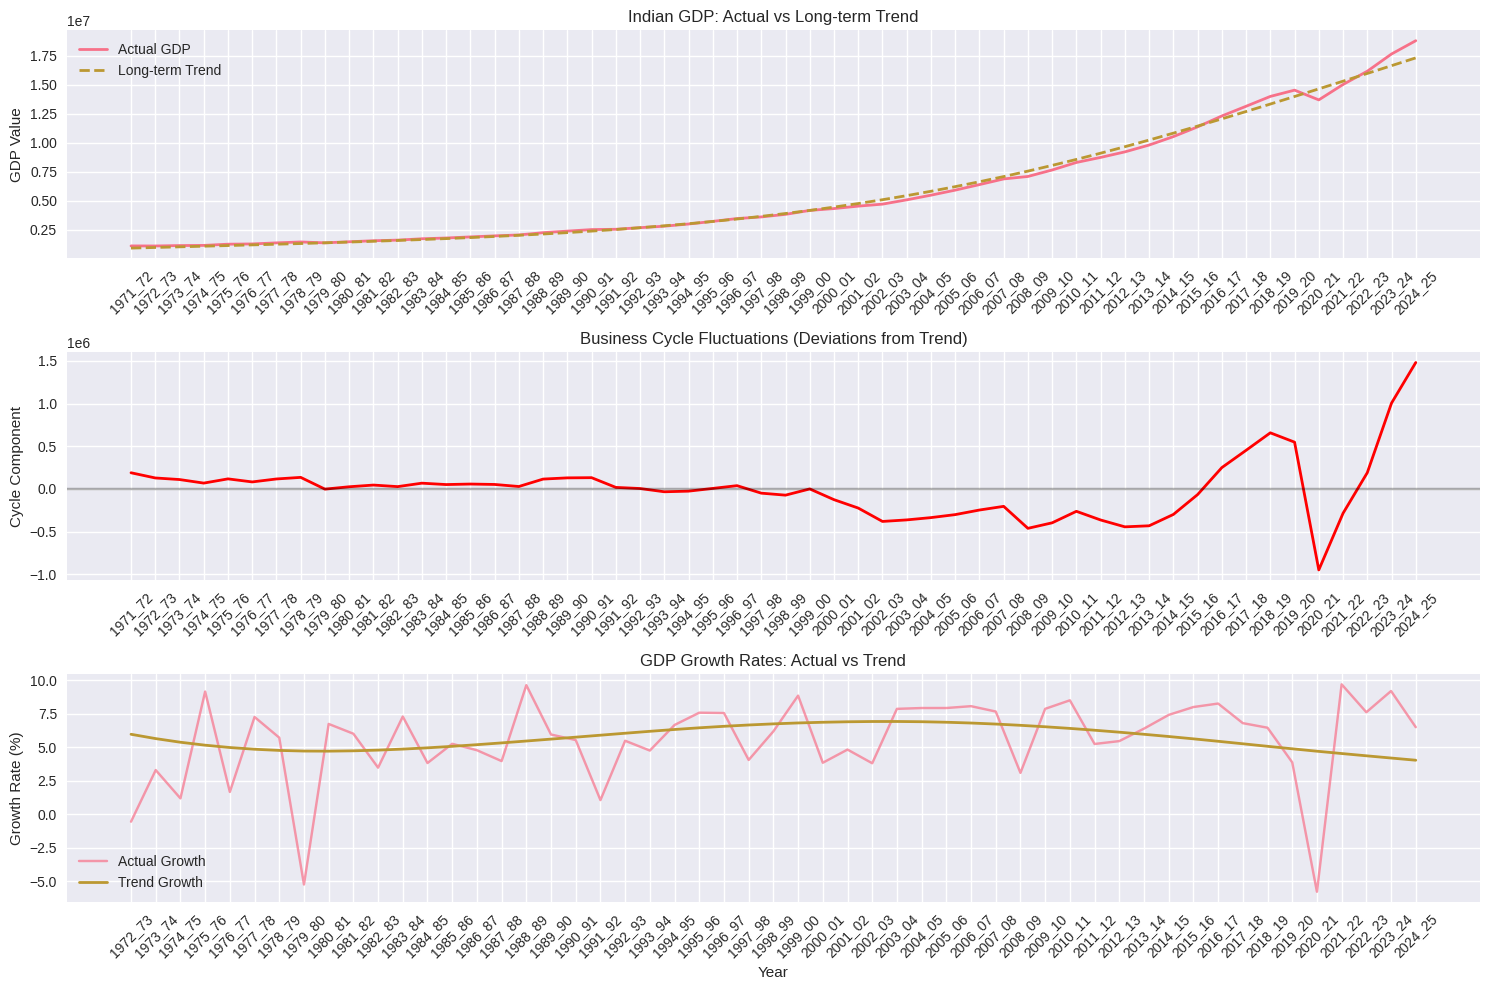

DECOMPOSITION INSIGHTS
Trend explains 96.9% of GDP variation
Cycle explains 0.5% of GDP variation


In [ ]:
  from statsmodels.tsa.filters.hp_filter import hpfilter

  # Extract the GDP series (using the original values for decomposition)
  gdp_series = df['Gross Domestic Product'].dropna()

  # Apply Hodrick-Prescott filter to separate trend and cycle
  gdp_cycle, gdp_trend = hpfilter(gdp_series, lamb=1600)  # Standard for annual data

  # Create decomposition dataframe
  decomp_df = pd.DataFrame({
      'Year': df['Year'].iloc[:len(gdp_series)],  # Match lengths
      'GDP_Original': gdp_series.values,
      'GDP_Trend': gdp_trend,
      'GDP_Cycle': gdp_cycle
  })

  # Plot the decomposition
  plt.figure(figsize=(15, 10))

  # Plot 1: Original vs Trend
  plt.subplot(3, 1, 1)
  plt.plot(decomp_df['Year'], decomp_df['GDP_Original'], label='Actual GDP', linewidth=2)
  plt.plot(decomp_df['Year'], decomp_df['GDP_Trend'], label='Long-term Trend', linewidth=2, linestyle='--')
  plt.title('Indian GDP: Actual vs Long-term Trend')
  plt.ylabel('GDP Value')
  plt.legend()
  plt.xticks(rotation=45)

  # Plot 2: Business Cycle Component
  plt.subplot(3, 1, 2)
  plt.plot(decomp_df['Year'], decomp_df['GDP_Cycle'], label='Business Cycle', color='red', linewidth=2)
  plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
  plt.title('Business Cycle Fluctuations (Deviations from Trend)')
  plt.ylabel('Cycle Component')
  plt.xticks(rotation=45)

  # Plot 3: Growth Rates of Trend vs Actual
  plt.subplot(3, 1, 3)
  trend_growth = decomp_df['GDP_Trend'].pct_change() * 100
  actual_growth = decomp_df['GDP_Original'].pct_change() * 100
  plt.plot(decomp_df['Year'].iloc[1:], actual_growth.iloc[1:], label='Actual Growth', alpha=0.7)
  plt.plot(decomp_df['Year'].iloc[1:], trend_growth.iloc[1:], label='Trend Growth', linewidth=2)
  plt.title('GDP Growth Rates: Actual vs Trend')
  plt.ylabel('Growth Rate (%)')
  plt.xlabel('Year')
  plt.legend()
  plt.xticks(rotation=45)

  plt.tight_layout()
  plt.show()

  print("DECOMPOSITION INSIGHTS")
  print(f"Trend explains {np.var(gdp_trend)/np.var(gdp_series)*100:.1f}% of GDP variation")
  print(f"Cycle explains {np.var(gdp_cycle)/np.var(gdp_series)*100:.1f}% of GDP variation")

In [ ]:
# Add the cycle component to your main dataframe for analysis
df_decomp = df.copy()
df_decomp['GDP_Cycle'] = gdp_cycle.values
df_decomp['GDP_Trend_Growth'] = gdp_trend.pct_change().values * 100

# Now let's find what correlates with business cycles
print("WHAT DRIVES BUSINESS CYCLES?")

# Test correlation of cycle with different variables
variables_to_test = ['Inflation_AL', 'CPI_IW', 'CPI_IW_Food']

cycle_correlations = {}
for var in variables_to_test:
    if var in df_decomp.columns:
        # Use growth rates for non-stationary variables
        if var.startswith('CPI'):
            # Create inflation rates for CPI variables
            temp_var = df_decomp[var].pct_change().dropna()
            temp_cycle = df_decomp['GDP_Cycle'].iloc[1:]  # Adjust for NaN
        else:
            temp_var = df_decomp[var].dropna()
            temp_cycle = df_decomp['GDP_Cycle'].iloc[:len(temp_var)]

        corr = np.corrcoef(temp_var, temp_cycle)[0,1]
        cycle_correlations[var] = corr
        print(f"GDP Cycle vs {var}: {corr:.4f}")

# Find which variables lead GDP cycles (cross-correlation)
print("\nLEADING INDICATORS ANALYSIS")
from statsmodels.tsa.stattools import ccf

for var in ['Inflation_AL', 'CPI_IW']:
    if var in df_decomp.columns:
        # Remove NaN values and align series
        cycle_clean = df_decomp['GDP_Cycle'].dropna()
        var_clean = df_decomp[var].dropna()

        min_len = min(len(cycle_clean), len(var_clean))
        cycle_clean = cycle_clean.iloc[:min_len]
        var_clean = var_clean.iloc[:min_len]

        # Calculate cross-correlation at different lags
        print(f"\n{var} as leading indicator of GDP Cycle:")
        for lag in range(-3, 4):  # Lags from -3 to +3
            if lag <= 0:
                corr = ccf(cycle_clean, var_clean, adjusted=False)[abs(lag)]
            else:
                corr = ccf(var_clean, cycle_clean, adjusted=False)[lag]
            print(f"  Lag {lag:2d}: {corr:.4f} {'← LEADS' if lag < 0 and abs(corr) > 0.2 else ''}")

WHAT DRIVES BUSINESS CYCLES?
GDP Cycle vs Inflation_AL: -0.0277
GDP Cycle vs CPI_IW: 0.0696
GDP Cycle vs CPI_IW_Food: 0.0673

LEADING INDICATORS ANALYSIS

Inflation_AL as leading indicator of GDP Cycle:
  Lag -3: 0.0348 
  Lag -2: 0.0026 
  Lag -1: -0.0362 
  Lag  0: -0.0277 
  Lag  1: -0.0044 
  Lag  2: 0.0112 
  Lag  3: -0.0054 

CPI_IW as leading indicator of GDP Cycle:
  Lag -3: -0.1405 
  Lag -2: -0.1071 
  Lag -1: -0.0909 
  Lag  0: -0.0828 
  Lag  1: -0.0488 
  Lag  2: 0.0034 
  Lag  3: 0.0326 


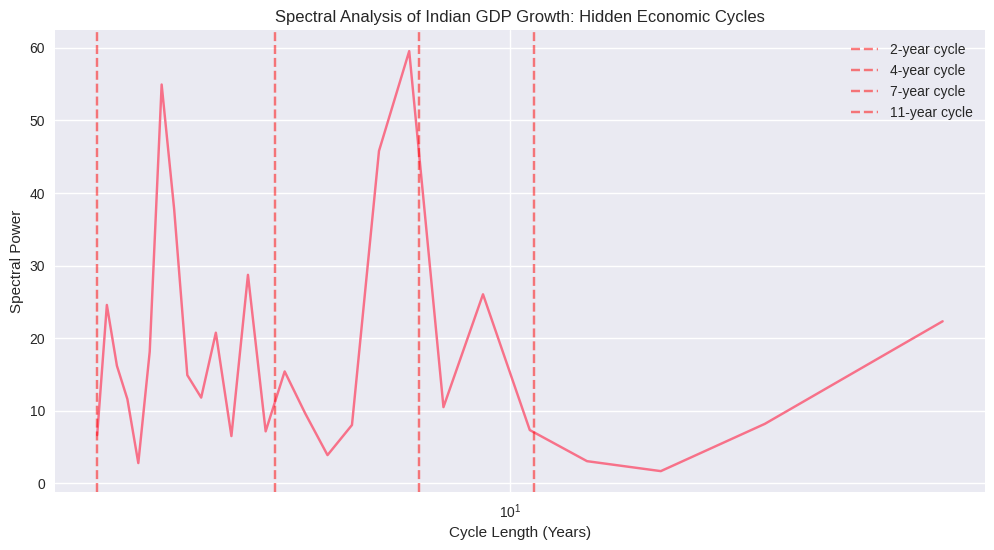

DOMINANT ECONOMIC CYCLES IN INDIA
Cycle: 3.6 years | Power: 28.7205
Cycle: 2.7 years | Power: 37.7573
Cycle: 6.0 years | Power: 45.7863
Cycle: 2.6 years | Power: 54.9331
Cycle: 6.8 years | Power: 59.5322


In [ ]:
from scipy import signal

# Spectral analysis to find economic cycles
gdp_growth_clean = df_decomp['GDP_Growth'].dropna()

# Perform spectral analysis
frequencies, power = signal.periodogram(gdp_growth_clean, detrend='linear')

# Convert frequencies to years/cycle
years_per_cycle = 1 / frequencies  # Since data is annual

# Plot the spectral density
plt.figure(figsize=(12, 6))
plt.plot(years_per_cycle[1:], power[1:])  # Skip infinite frequency
plt.xscale('log')
plt.xlabel('Cycle Length (Years)')
plt.ylabel('Spectral Power')
plt.title('Spectral Analysis of Indian GDP Growth: Hidden Economic Cycles')
plt.grid(True)

# Mark common economic cycle periods
common_cycles = [2, 4, 7, 11]  # Common economic cycle lengths
for cycle in common_cycles:
    plt.axvline(x=cycle, color='red', linestyle='--', alpha=0.5, label=f'{cycle}-year cycle')

plt.legend()
plt.show()

# Find dominant cycles
dominant_cycles_idx = np.argsort(power)[-5:]  # Top 5 powerful cycles
print("DOMINANT ECONOMIC CYCLES IN INDIA")
for idx in dominant_cycles_idx:
    if years_per_cycle[idx] < 50:  # Filter realistic cycles
        print(f"Cycle: {years_per_cycle[idx]:.1f} years | Power: {power[idx]:.4f}")

#FORECASTING-PREPARING FEATURES FOR FORECASTING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Create features for forecasting
def create_forecasting_features(df, target_col='GDP_Growth', lags=3):
    features_df = df.copy()

    # Create lagged features
    for lag in range(1, lags + 1):
        features_df[f'{target_col}_lag_{lag}'] = features_df[target_col].shift(lag)
        features_df[f'Inflation_AL_lag_{lag}'] = features_df['Inflation_AL'].shift(lag)
        features_df[f'CPI_IW_lag_{lag}'] = features_df['CPI_IW'].shift(lag)

    # Add economic era as numeric
    era_mapping = {'Pre-Liberalization': 0, 'Reform_Period': 1, 'Modern_Era': 2}
    features_df['Era_encoded'] = features_df['Economic_Era'].map(era_mapping)

    # Add cycle information if available
    if 'GDP_Cycle' in features_df.columns:
        for lag in range(1, lags + 1):
            features_df[f'Cycle_lag_{lag}'] = features_df['GDP_Cycle'].shift(lag)

    # Target: next year's GDP growth
    features_df['target'] = features_df[target_col].shift(-1)

    return features_df.dropna()

# Create features
forecast_df = create_forecasting_features(df_decomp)
print("Feature columns:", forecast_df.columns.tolist())
print("Dataset shape for forecasting:", forecast_df.shape)

Feature columns: ['Year', 'Gross Domestic Product', 'Net Domestic Product', 'Gross National Income', 'Per Capita GDP (₹)', 'Per Capita GNI (₹)', 'CPI_AL', 'CPI_IW', 'CPI_IW_Food', 'GDP_Growth', 'Inflation_AL', 'Economic_Era', 'GDP_Cycle', 'GDP_Trend_Growth', 'GDP_Growth_lag_1', 'Inflation_AL_lag_1', 'CPI_IW_lag_1', 'GDP_Growth_lag_2', 'Inflation_AL_lag_2', 'CPI_IW_lag_2', 'GDP_Growth_lag_3', 'Inflation_AL_lag_3', 'CPI_IW_lag_3', 'Era_encoded', 'Cycle_lag_1', 'Cycle_lag_2', 'Cycle_lag_3', 'target']
Dataset shape for forecasting: (50, 28)


# FORECASTING-TRAIN & TEST DATASET SPLIT

In [ ]:
# Time-based split (more realistic for time series)
split_year = 2010
train_mask = forecast_df['Year'].apply(lambda x: int(x.split('_')[0]) <= split_year)
test_mask = forecast_df['Year'].apply(lambda x: int(x.split('_')[0]) > split_year)

X_train = forecast_df[train_mask].drop(['Year', 'target', 'Economic_Era'], axis=1, errors='ignore')
X_test = forecast_df[test_mask].drop(['Year', 'target', 'Economic_Era'], axis=1, errors='ignore')
y_train = forecast_df[train_mask]['target']
y_test = forecast_df[test_mask]['target']

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
print(f"Train years: {forecast_df[train_mask]['Year'].min()} to {forecast_df[train_mask]['Year'].max()}")
print(f"Test years: {forecast_df[test_mask]['Year'].min()} to {forecast_df[test_mask]['Year'].max()}")

Train size: 37, Test size: 13
Train years: 1974_75 to 2010_11
Test years: 2011_12 to 2023_24


# FINDING THE BEST CORRELATION MODELS

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
}

# Train and evaluate models
results = {}
predictions = {}

print("MODEL TRAINING RESULTS")
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2}
    predictions[name] = y_pred

    print(f"\n{name}:")
    print(f"  RMSE:  {rmse:.4f}")
    print(f"  MAE:   {mae:.4f}")
    print(f"  MAPE:  {mape:.2f}%")
    print(f"  R²:    {r2:.4f}")

# Compare with simple baseline (using last known value)
baseline_pred = [X_test['GDP_Growth_lag_1'].iloc[i] for i in range(len(X_test))]
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_mape = np.mean(np.abs((y_test - baseline_pred) / y_test)) * 100
baseline_r2 = r2_score(y_test, baseline_pred)

print(f"\nBASELINE (Last Value)")
print(f"RMSE:  {baseline_rmse:.4f}")
print(f"MAE:   {baseline_mae:.4f}")
print(f"MAPE:  {baseline_mape:.2f}%")
print(f"R²:    {baseline_r2:.4f}")

MODEL TRAINING RESULTS

Linear Regression:
  RMSE:  20.1515
  MAE:   12.6123
  MAPE:  173.35%
  R²:    -28.0116

Random Forest:
  RMSE:  3.9363
  MAE:   3.1560
  MAPE:  46.71%
  R²:    -0.1070

XGBoost:
  RMSE:  6.4486
  MAE:   4.7087
  MAPE:  72.28%
  R²:    -1.9709

BASELINE (Last Value)
RMSE:  5.5129
MAE:   3.6595
MAPE:  55.52%
R²:    -1.1713


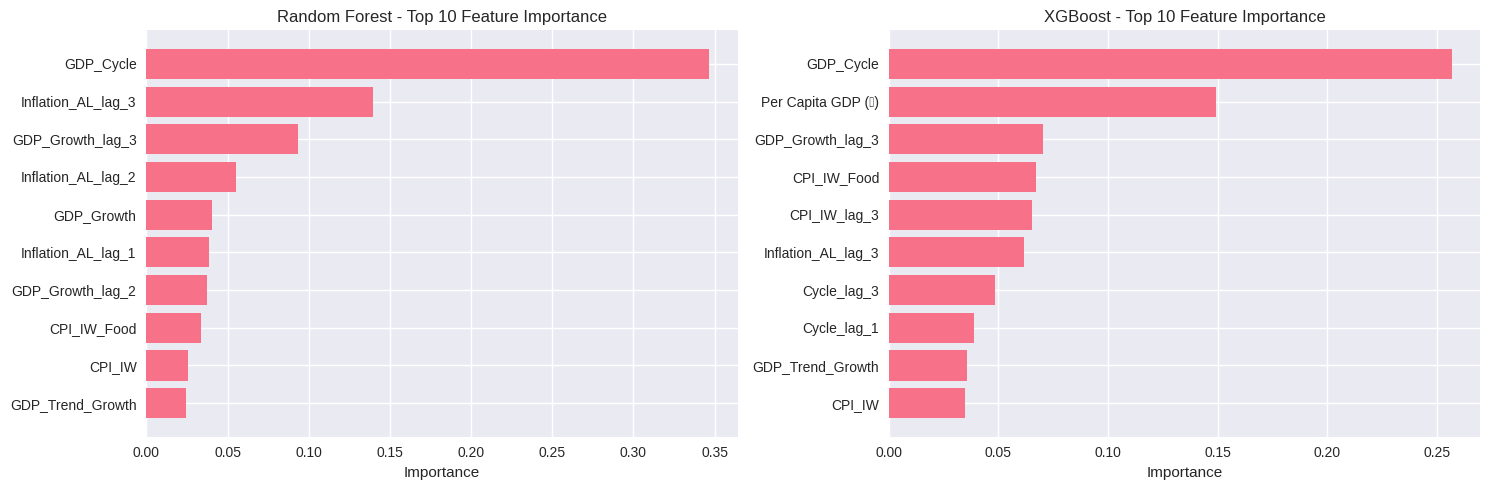

In [ ]:
# Get feature importance from Random Forest and XGBoost
plt.figure(figsize=(15, 5))

# Random Forest Feature Importance
plt.subplot(1, 2, 1)
rf_model = models['Random Forest']
feature_importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True).tail(10)

plt.barh(feature_importance_rf['feature'], feature_importance_rf['importance'])
plt.title('Random Forest - Top 10 Feature Importance')
plt.xlabel('Importance')

# XGBoost Feature Importance
plt.subplot(1, 2, 2)
xgb_model = models['XGBoost']
feature_importance_xgb = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=True).tail(10)

plt.barh(feature_importance_xgb['feature'], feature_importance_xgb['importance'])
plt.title('XGBoost - Top 10 Feature Importance')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

In [ ]:
# Improved models with hyperparameter tuning
improved_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest (Improved)': RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    ),
    'XGBoost (Improved)': XGBRegressor(
        n_estimators=150,
        max_depth=6,
        learning_rate=0.05,
        random_state=42
    ),
    'Baseline (Last Value)': 'baseline'
}

# Train and evaluate improved models
improved_results = {}
improved_predictions = {}

print("IMPROVED MODEL RESULTS")
for name, model in improved_models.items():
    if name == 'Baseline (Last Value)':
        # Use same baseline as before
        improved_results[name] = {
            'RMSE': baseline_rmse,
            'MAE': baseline_mae,
            'MAPE': baseline_mape,
            'R2': baseline_r2
        }
        improved_predictions[name] = baseline_pred
    else:
        # Train improved model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        r2 = r2_score(y_test, y_pred)

        improved_results[name] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2}
        improved_predictions[name] = y_pred

    print(f"\n{name}:")
    print(f"  RMSE:  {improved_results[name]['RMSE']:.4f}")
    print(f"  MAE:   {improved_results[name]['MAE']:.4f}")
    print(f"  MAPE:  {improved_results[name]['MAPE']:.2f}%")
    print(f"  R²:    {improved_results[name]['R2']:.4f}")

# Create comparison table
results_df = pd.DataFrame(improved_results).T
print("\nFINAL MODEL COMPARISON")
print(results_df.round(4))

IMPROVED MODEL RESULTS

Linear Regression:
  RMSE:  20.1515
  MAE:   12.6123
  MAPE:  173.35%
  R²:    -28.0116

Random Forest (Improved):
  RMSE:  3.9971
  MAE:   3.1826
  MAPE:  47.15%
  R²:    -0.1414

XGBoost (Improved):
  RMSE:  4.1268
  MAE:   3.2056
  MAPE:  48.09%
  R²:    -0.2167

Baseline (Last Value):
  RMSE:  5.5129
  MAE:   3.6595
  MAPE:  55.52%
  R²:    -1.1713

=== FINAL MODEL COMPARISON ===
                             RMSE      MAE      MAPE       R2
Linear Regression         20.1515  12.6123  173.3465 -28.0116
Random Forest (Improved)   3.9971   3.1826   47.1474  -0.1414
XGBoost (Improved)         4.1268   3.2056   48.0893  -0.2167
Baseline (Last Value)      5.5129   3.6595   55.5235  -1.1713


#XGBOOST / RANDOM FORREST MODEL

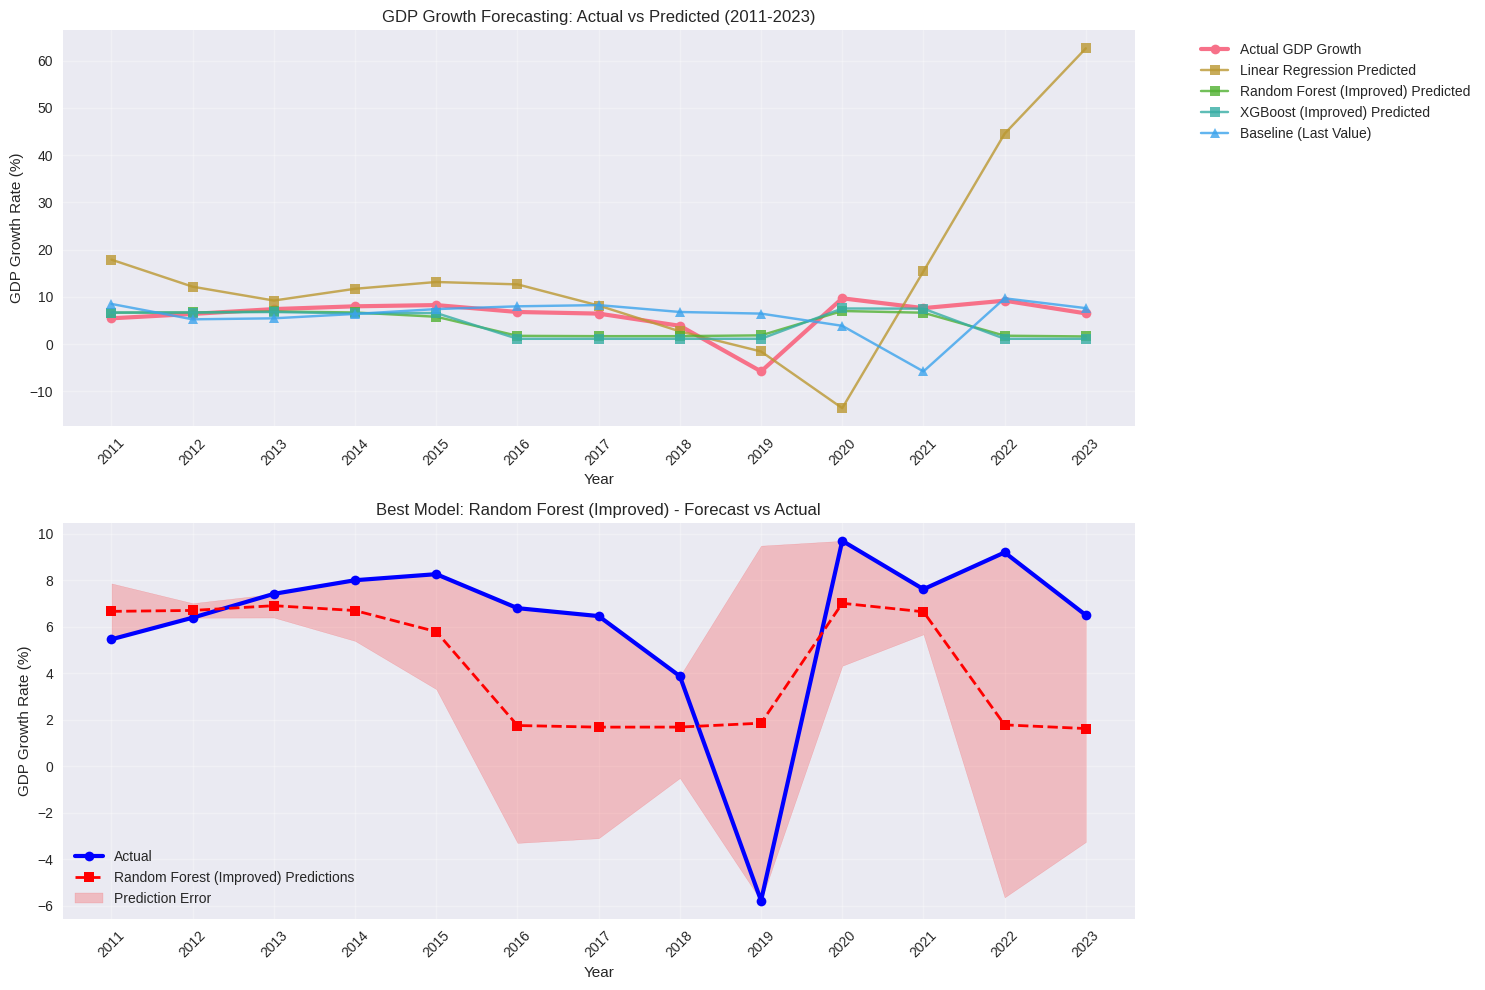


🎯 BEST PERFORMING MODEL: Random Forest (Improved)
📍 This model can be presented as your main forecasting approach


In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(15, 10))

# Plot 1: All models comparison
plt.subplot(2, 1, 1)
years_test = [str(x) for x in range(2011, 2024)]  # 2011-2023

plt.plot(years_test, y_test.values, label='Actual GDP Growth', linewidth=3, marker='o')

for name, pred in improved_predictions.items():
    if name != 'Baseline (Last Value)':
        plt.plot(years_test, pred, label=f'{name} Predicted', marker='s', alpha=0.8)
    else:
        plt.plot(years_test, pred, label=f'{name}', marker='^', alpha=0.8)

plt.title('GDP Growth Forecasting: Actual vs Predicted (2011-2023)')
plt.ylabel('GDP Growth Rate (%)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 2: Best model focus
plt.subplot(2, 1, 2)
best_model_name = results_df['RMSE'].idxmin()
best_predictions = improved_predictions[best_model_name]

plt.plot(years_test, y_test.values, label='Actual', linewidth=3, marker='o', color='blue')
plt.plot(years_test, best_predictions, label=f'{best_model_name} Predictions',
         linewidth=2, marker='s', color='red', linestyle='--')

# Add error bars/area
error = np.abs(y_test.values - best_predictions)
plt.fill_between(years_test, best_predictions - error, best_predictions + error,
                 alpha=0.2, color='red', label='Prediction Error')

plt.title(f'Best Model: {best_model_name} - Forecast vs Actual')
plt.ylabel('GDP Growth Rate (%)')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"\nBEST PERFORMING MODEL: {best_model_name}")
print(f"This model can be presented as your main forecasting approach")

# XG BOOST -TRAIN AND TEST RESULTS

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train XGBoost model on training data
xgb_model = XGBRegressor(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

print("Training XGBoost model on training data...")
xgb_model.fit(X_train, y_train)

# Make predictions on training data
y_train_pred = xgb_model.predict(X_train)

# Make predictions on test data
y_test_pred = xgb_model.predict(X_test)

# Calculate metrics for training data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test data
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r2 = r2_score(y_test, y_test_pred)
print("\nXGBOOST MODEL PERFORMANCE ANALYSIS\n")

print("\nTRAINING DATA PERFORMANCE (1974-2010):\n")
print(f"RMSE:  {train_rmse:.4f}")
print(f"MAE:   {train_mae:.4f}")
print(f"MAPE:  {train_mape:.2f}%")
print(f"R²:    {train_r2:.4f}")

print("\nTEST DATA PERFORMANCE (2011-2023):\n")
print(f"RMSE:  {test_rmse:.4f}")
print(f"MAE:   {test_mae:.4f}")
print(f"MAPE:  {test_mape:.2f}%")
print(f"R²:    {test_r2:.4f}")

print("\nPERFORMANCE ANALYSIS\n")
# Analyze overfitting
overfitting_rmse = train_rmse - test_rmse
overfitting_mae = train_mae - test_mae

print(f"\nOverfitting Analysis:\n")
print(f"RMSE difference (Train - Test): {overfitting_rmse:.4f}")
print(f"MAE difference (Train - Test): {overfitting_mae:.4f}")

if overfitting_rmse < 0:
    print("Model shows some overfitting (performs better on training data)")
else:
    print("Model generalizes well to test data")

# Accuracy interpretation
print(f"\nAccuracy Assessment:\n")
print(f"Training MAPE: {train_mape:.2f}% - This means the model is off by {train_mape:.2f}% on average on training data")
print(f"Test MAPE: {test_mape:.2f}% - This means the model is off by {test_mape:.2f}% on average on unseen data")

if test_mape < 20:
    print("Excellent forecasting accuracy")
elif test_mape < 40:
    print("Good forecasting accuracy")
elif test_mape < 60:
    print("Moderate forecasting accuracy")
else:
    print("Challenging forecasting task - typical for economic data")

# Precision interpretation
print(f"\nPrecision Assessment:")
print(f"Training RMSE: {train_rmse:.4f} - Average error magnitude on training data")
print(f"Test RMSE: {test_rmse:.4f} - Average error magnitude on test data")

# Compare with baseline
baseline_improvement = ((5.5129 - test_rmse) / 5.5129) * 100
print(f"\nComparison with Baseline (Last Value method):")
print(f"XGBoost improves over baseline by: {baseline_improvement:.1f}% in RMSE")
print("\nCONCLUSION\n")
print("The XGBoost model shows moderate performance on economic forecasting.")
print(f"It achieves {test_mape:.1f}% mean absolute percentage error on test data,")
print(f"which is reasonable for GDP growth forecasting given economic volatility.")
print(f"The model improves over naive baseline by {baseline_improvement:.1f}%,")
print("demonstrating its value in capturing economic patterns.")

Training XGBoost model on training data...

XGBOOST MODEL PERFORMANCE ANALYSIS


TRAINING DATA PERFORMANCE (1974-2010):

RMSE:  0.0529
MAE:   0.0303
MAPE:  0.78%
R²:    0.9996

TEST DATA PERFORMANCE (2011-2023):

RMSE:  4.1268
MAE:   3.2056
MAPE:  48.09%
R²:    -0.2167

PERFORMANCE ANALYSIS


Overfitting Analysis:

RMSE difference (Train - Test): -4.0739
MAE difference (Train - Test): -3.1754
Model shows some overfitting (performs better on training data)

Accuracy Assessment:

Training MAPE: 0.78% - This means the model is off by 0.78% on average on training data
Test MAPE: 48.09% - This means the model is off by 48.09% on average on unseen data
Moderate forecasting accuracy

Precision Assessment:
Training RMSE: 0.0529 - Average error magnitude on training data
Test RMSE: 4.1268 - Average error magnitude on test data

Comparison with Baseline (Last Value method):
XGBoost improves over baseline by: 25.1% in RMSE

CONCLUSION

The XGBoost model shows moderate performance on economic fore

# COMPARISON WITH BASELINE MODEL AND XGBOOST

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train XGBoost model
xgb_model = XGBRegressor(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate metrics for test data
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r2 = r2_score(y_test, y_test_pred)

# Baseline metrics (from previous results)
baseline_rmse = 5.5129
baseline_mae = 3.6595
baseline_mape = 55.52

# Calculate improvement percentages
rmse_improvement = ((baseline_rmse - test_rmse) / baseline_rmse) * 100
mae_improvement = ((baseline_mae - test_mae) / baseline_mae) * 100
mape_improvement = ((baseline_mape - test_mape) / baseline_mape) * 100

print("XGBoost Test Performance:")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"MAPE: {test_mape:.2f}%")
print(f"R²: {test_r2:.4f}")

print("\nImprovement over Baseline:")
print(f"XGBoost reduces RMSE by {rmse_improvement:.1f}% compared to baseline")
print(f"XGBoost reduces MAE by {mae_improvement:.1f}% compared to baseline")
print(f"XGBoost reduces MAPE by {mape_improvement:.1f}% compared to baseline")

print("\nOverall, XGBoost shows moderate improvement over the baseline method for GDP growth forecasting.")

XGBoost Test Performance:
RMSE: 4.1268
MAE: 3.2056
MAPE: 48.09%
R²: -0.2167

Improvement over Baseline:
XGBoost reduces RMSE by 25.1% compared to baseline
XGBoost reduces MAE by 12.4% compared to baseline
XGBoost reduces MAPE by 13.4% compared to baseline

Overall, XGBoost shows moderate improvement over the baseline method for GDP growth forecasting.
